In [19]:
#importamos las librerias que vamos a usar en el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statistics as stat
import scipy.stats as st
from statistics import stdev
from scipy import stats

In [20]:
#importamos la base 
base = pd.read_csv(r'C:\Users\u190850\Desktop\Python\Bases\datasets\Ciencia de datos\Base_DC_G6.csv', sep = ';')

In [21]:
pd.options.display.max_rows
pd.options.display.max_columns = None
base

,MOB_CUENTAS_ADELANTO,SALDO_CUENTA_ADELANTO,USA_CUENTA_ADELANTO,TIENE_TARJETA_VISA,VISA_MONTO_SALDO_RESUMEN,VISA_MONTO_SALDO_TOTAL,ANTIGUEDAD_MASTERCARD,MASTER_MONTO_SALDO_TOTAL,ANTIGUEDAD_CORDOBESA,CORDOBESA_MONTO_SALDO_TOTAL,CORDOBESA_MONTO_SALDO_RESUMEN,TIENE_TARJETA_CORDOBESA,SUM_CONSUMOS_TC_ULT_6M,CANT_TARJETAS_CREDITO,TARJETA_PREPAGA,EDAD,ESTADO_CIVIL,SEXO,ANTIGUEDAD_PRESTAMOS_PERSONALES,CANT_PMOS_PERSONALES,TASA_PMOS_PERSONALES,SALDO_PP_CAP_ORIGINAL_HISTORICO,MORA_ACTUAL_PRESTAMOS_PERSONALES,CANT_PMOS_HIPOTECARIOS,SALDO_PH_CAP_ORIGINAL_HISTORICO,MORA_ACTUAL_PH,CANT_REFINANCIACION_VIGENTES,SALDO_PR_CAP_ORIGINAL,CANT_REFINANCIACION_ULT6M,SALDO_PP_CAP_ORIGINAL,TIENE_CUENTA_BASICA,PAYROLL,CANT_TRANSFERENCIAS_RECIBIDAS,MONTO_TRANSFERENCIAS_RECIBIDAS,TIENE_PLAZO_FIJO,MONTO_PLAZO_FIJO_PESOS,RATIO_PLAZOFIJO_PESOS_3M_6M,TRANSACCIONES_POR_ATM_LINK_CANT,CANT_CAJERO_AJENO_TRANSACCIONES,CANT_AUTOSERVICIO_TRANSACCIONES,CANT_TARJ_DEBITO_TRANSACCIONES,GYM_CORDOBESA,GYM_VISA,GYM_PMOS_PERSONALES,MORA_ACTUAL_TARJETA_VISA,MORA_ACTUAL_TARJETA_CORDOBESA,MORA_ACTUAL_TARJETA_MASTERCARD,DESTINO_PRESTAMO_PERSONAL,CONSOLIDACION_DEUDA,RIESGO_ASOCIADO_LINEA,PERIODO_PROCESO,peor_sit_bancor_3meses,peor_sit_bancor_6meses,sin_productos_activos_6meses,peor_sit_no_bancor_3meses,peor_sit_no_bancor_6meses,cant_saldos_6meses,mob_cliente_meses,ANTIGUEDAD_TC,ANTIGUEDAD_VS,SITUACION_BANCOR2,SITUACION_NO_BANCOR2,meses_ult_sit_bancor_mayor1,meses_ult_sit_nobancor_mayor1,cant_sit_no_bancor_mayor1,cant_sit_bancor_mayor1,antiguedad_productos,Excluidos,tiene_saldo_prox12m,indeterminados,target
0,0,0.0,0,0,0.00000,0.000000,0,0.0,120,0.000000,0.000000,1,0.000000,0,0,85,Viudo/a,FEMENINO,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0,0.000000,0,0,0,0.0,0,0.000000e+00,0.000,0,0,0,0,0,0,0,0,0,0,Sin prÃ©stamos personales,Sin consolidaciÃ³n,Sin prÃ©stamos personales,201905,1,1,0,1,1,3,160.0,52.0,NaN,0,1,-1,-1,0,0,52,0,0,1,0
1,0,0.0,0,0,0.00000,0.000000,0,0.0,118,13403.020000,10279.500000,1,45122.400000,1,0,80,Casado/a,MASCULINO,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0,0.000000,0,0,0,0.0,1,9.256815e+05,0.527,0,0,0,0,0,0,0,0,0,0,Sin prÃ©stamos personales,Sin consolidaciÃ³n,Sin prÃ©stamos personales,201905,1,1,0,1,1,6,772.0,52.0,NaN,1,1,-1,-1,0,0,52,0,1,0,1
2,77,0.0,0,1,3285.09765,7332.180997,0,0.0,112,40792.815723,19148.223801,1,129152.176510,2,1,74,Casado/a,FEMENINO,18,1,26.0,529456.925900,0,0,0.0,0,0,0.0,0,0.000000,0,0,0,0.0,1,1.968706e+06,0.719,17,1,16,45,0,0,0,0,0,0,Con destino,ConsolidaciÃ³n PP,Bajo,201901,1,1,0,1,1,6,768.0,48.0,48.0,1,1,-1,-1,0,0,48,0,1,0,0
3,0,0.0,0,0,0.00000,0.000000,0,0.0,52,33223.811768,15589.302723,1,96132.505700,1,0,71,Casado/a,MASCULINO,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0,0.000000,1,0,0,0.0,1,4.715304e+04,1.000,4,0,3,0,0,0,0,0,0,0,Sin prÃ©stamos personales,Sin consolidaciÃ³n,Sin prÃ©stamos personales,201906,1,1,0,1,1,6,274.0,49.0,NaN,1,1,-1,-1,0,0,49,0,1,0,0
4,0,0.0,0,0,0.00000,0.000000,0,0.0,116,0.000000,0.000000,1,876.335422,0,0,72,Soltero/a,FEMENINO,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0,0.000000,0,0,0,0.0,0,0.000000e+00,0.000,0,0,0,0,0,0,0,0,0,0,Sin prÃ©stamos personales,Sin consolidaciÃ³n,Sin prÃ©stamos personales,201903,1,1,0,1,1,3,164.0,50.0,NaN,0,1,-1,-1,0,0,50,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83953,7,0.0,0,0,0.00000,0.000000,0,0.0,7,44955.870000,25479.840000,1,60436.900000,1,0,26,Soltero/a,FEMENINO,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0,0.000000,0,0,0,0.0,0,0.000000e+00,0.000,0,0,0,0,0,0,0,0,63,0,Sin prÃ©stamos personales,Sin consolidaciÃ³n,Sin prÃ©stamos personales,201905,2,2,0,0,0,6,6.0,6.0,NaN,2,0,0,-1,0,1,6,0,1,1,1
83954,0,0.0,0,0,0.00000,0.000000,0,0.0,7,17108.771563,12210.495395,1,13962.994535,1,0,67,Soltero/a,MASCULINO,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0,0.000000,0,0,0,0.0,0,0.000000e+00,0.000,0,0,0,

In [22]:
#Me quedo solo con las variables tipo numericas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numbase = base.select_dtypes(include=numerics)

In [23]:
base

,MOB_CUENTAS_ADELANTO,SALDO_CUENTA_ADELANTO,USA_CUENTA_ADELANTO,TIENE_TARJETA_VISA,VISA_MONTO_SALDO_RESUMEN,VISA_MONTO_SALDO_TOTAL,ANTIGUEDAD_MASTERCARD,MASTER_MONTO_SALDO_TOTAL,ANTIGUEDAD_CORDOBESA,CORDOBESA_MONTO_SALDO_TOTAL,CORDOBESA_MONTO_SALDO_RESUMEN,TIENE_TARJETA_CORDOBESA,SUM_CONSUMOS_TC_ULT_6M,CANT_TARJETAS_CREDITO,TARJETA_PREPAGA,EDAD,ESTADO_CIVIL,SEXO,ANTIGUEDAD_PRESTAMOS_PERSONALES,CANT_PMOS_PERSONALES,TASA_PMOS_PERSONALES,SALDO_PP_CAP_ORIGINAL_HISTORICO,MORA_ACTUAL_PRESTAMOS_PERSONALES,CANT_PMOS_HIPOTECARIOS,SALDO_PH_CAP_ORIGINAL_HISTORICO,MORA_ACTUAL_PH,CANT_REFINANCIACION_VIGENTES,SALDO_PR_CAP_ORIGINAL,CANT_REFINANCIACION_ULT6M,SALDO_PP_CAP_ORIGINAL,TIENE_CUENTA_BASICA,PAYROLL,CANT_TRANSFERENCIAS_RECIBIDAS,MONTO_TRANSFERENCIAS_RECIBIDAS,TIENE_PLAZO_FIJO,MONTO_PLAZO_FIJO_PESOS,RATIO_PLAZOFIJO_PESOS_3M_6M,TRANSACCIONES_POR_ATM_LINK_CANT,CANT_CAJERO_AJENO_TRANSACCIONES,CANT_AUTOSERVICIO_TRANSACCIONES,CANT_TARJ_DEBITO_TRANSACCIONES,GYM_CORDOBESA,GYM_VISA,GYM_PMOS_PERSONALES,MORA_ACTUAL_TARJETA_VISA,MORA_ACTUAL_TARJETA_CORDOBESA,MORA_ACTUAL_TARJETA_MASTERCARD,DESTINO_PRESTAMO_PERSONAL,CONSOLIDACION_DEUDA,RIESGO_ASOCIADO_LINEA,PERIODO_PROCESO,peor_sit_bancor_3meses,peor_sit_bancor_6meses,sin_productos_activos_6meses,peor_sit_no_bancor_3meses,peor_sit_no_bancor_6meses,cant_saldos_6meses,mob_cliente_meses,ANTIGUEDAD_TC,ANTIGUEDAD_VS,SITUACION_BANCOR2,SITUACION_NO_BANCOR2,meses_ult_sit_bancor_mayor1,meses_ult_sit_nobancor_mayor1,cant_sit_no_bancor_mayor1,cant_sit_bancor_mayor1,antiguedad_productos,Excluidos,tiene_saldo_prox12m,indeterminados,target
0,0,0.0,0,0,0.00000,0.000000,0,0.0,120,0.000000,0.000000,1,0.000000,0,0,85,Viudo/a,FEMENINO,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0,0.000000,0,0,0,0.0,0,0.000000e+00,0.000,0,0,0,0,0,0,0,0,0,0,Sin prÃ©stamos personales,Sin consolidaciÃ³n,Sin prÃ©stamos personales,201905,1,1,0,1,1,3,160.0,52.0,NaN,0,1,-1,-1,0,0,52,0,0,1,0
1,0,0.0,0,0,0.00000,0.000000,0,0.0,118,13403.020000,10279.500000,1,45122.400000,1,0,80,Casado/a,MASCULINO,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0,0.000000,0,0,0,0.0,1,9.256815e+05,0.527,0,0,0,0,0,0,0,0,0,0,Sin prÃ©stamos personales,Sin consolidaciÃ³n,Sin prÃ©stamos personales,201905,1,1,0,1,1,6,772.0,52.0,NaN,1,1,-1,-1,0,0,52,0,1,0,1
2,77,0.0,0,1,3285.09765,7332.180997,0,0.0,112,40792.815723,19148.223801,1,129152.176510,2,1,74,Casado/a,FEMENINO,18,1,26.0,529456.925900,0,0,0.0,0,0,0.0,0,0.000000,0,0,0,0.0,1,1.968706e+06,0.719,17,1,16,45,0,0,0,0,0,0,Con destino,ConsolidaciÃ³n PP,Bajo,201901,1,1,0,1,1,6,768.0,48.0,48.0,1,1,-1,-1,0,0,48,0,1,0,0
3,0,0.0,0,0,0.00000,0.000000,0,0.0,52,33223.811768,15589.302723,1,96132.505700,1,0,71,Casado/a,MASCULINO,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0,0.000000,1,0,0,0.0,1,4.715304e+04,1.000,4,0,3,0,0,0,0,0,0,0,Sin prÃ©stamos personales,Sin consolidaciÃ³n,Sin prÃ©stamos personales,201906,1,1,0,1,1,6,274.0,49.0,NaN,1,1,-1,-1,0,0,49,0,1,0,0
4,0,0.0,0,0,0.00000,0.000000,0,0.0,116,0.000000,0.000000,1,876.335422,0,0,72,Soltero/a,FEMENINO,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0,0.000000,0,0,0,0.0,0,0.000000e+00,0.000,0,0,0,0,0,0,0,0,0,0,Sin prÃ©stamos personales,Sin consolidaciÃ³n,Sin prÃ©stamos personales,201903,1,1,0,1,1,3,164.0,50.0,NaN,0,1,-1,-1,0,0,50,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83953,7,0.0,0,0,0.00000,0.000000,0,0.0,7,44955.870000,25479.840000,1,60436.900000,1,0,26,Soltero/a,FEMENINO,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0,0.000000,0,0,0,0.0,0,0.000000e+00,0.000,0,0,0,0,0,0,0,0,63,0,Sin prÃ©stamos personales,Sin consolidaciÃ³n,Sin prÃ©stamos personales,201905,2,2,0,0,0,6,6.0,6.0,NaN,2,0,0,-1,0,1,6,0,1,1,1
83954,0,0.0,0,0,0.00000,0.000000,0,0.0,7,17108.771563,12210.495395,1,13962.994535,1,0,67,Soltero/a,MASCULINO,0,0,0.0,0.000000,0,0,0.0,0,0,0.0,0,0.000000,0,0,0,0.0,0,0.000000e+00,0.000,0,0,0,

In [6]:
#Vemos las caracteristicas de la base 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83958 entries, 0 to 83957
Data columns (total 71 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MOB_CUENTAS_ADELANTO              83958 non-null  int64  
 1   SALDO_CUENTA_ADELANTO             83958 non-null  float64
 2   USA_CUENTA_ADELANTO               83958 non-null  int64  
 3   TIENE_TARJETA_VISA                83958 non-null  int64  
 4   VISA_MONTO_SALDO_RESUMEN          83958 non-null  float64
 5   VISA_MONTO_SALDO_TOTAL            83958 non-null  float64
 6   ANTIGUEDAD_MASTERCARD             83958 non-null  int64  
 7   MASTER_MONTO_SALDO_TOTAL          83958 non-null  float64
 8   ANTIGUEDAD_CORDOBESA              83958 non-null  int64  
 9   CORDOBESA_MONTO_SALDO_TOTAL       83958 non-null  float64
 10  CORDOBESA_MONTO_SALDO_RESUMEN     83958 non-null  float64
 11  TIENE_TARJETA_CORDOBESA           83958 non-null  int64  
 12  SUM_

In [7]:
#Analizamos los estadisticos basicos de las variables numericas
base.describe()

,MOB_CUENTAS_ADELANTO,SALDO_CUENTA_ADELANTO,USA_CUENTA_ADELANTO,TIENE_TARJETA_VISA,VISA_MONTO_SALDO_RESUMEN,VISA_MONTO_SALDO_TOTAL,ANTIGUEDAD_MASTERCARD,MASTER_MONTO_SALDO_TOTAL,ANTIGUEDAD_CORDOBESA,CORDOBESA_MONTO_SALDO_TOTAL,CORDOBESA_MONTO_SALDO_RESUMEN,TIENE_TARJETA_CORDOBESA,SUM_CONSUMOS_TC_ULT_6M,CANT_TARJETAS_CREDITO,TARJETA_PREPAGA,EDAD,ANTIGUEDAD_PRESTAMOS_PERSONALES,CANT_PMOS_PERSONALES,TASA_PMOS_PERSONALES,SALDO_PP_CAP_ORIGINAL_HISTORICO,MORA_ACTUAL_PRESTAMOS_PERSONALES,CANT_PMOS_HIPOTECARIOS,SALDO_PH_CAP_ORIGINAL_HISTORICO,MORA_ACTUAL_PH,CANT_REFINANCIACION_VIGENTES,SALDO_PR_CAP_ORIGINAL,CANT_REFINANCIACION_ULT6M,SALDO_PP_CAP_ORIGINAL,TIENE_CUENTA_BASICA,PAYROLL,CANT_TRANSFERENCIAS_RECIBIDAS,MONTO_TRANSFERENCIAS_RECIBIDAS,TIENE_PLAZO_FIJO,MONTO_PLAZO_FIJO_PESOS,RATIO_PLAZOFIJO_PESOS_3M_6M,TRANSACCIONES_POR_ATM_LINK_CANT,CANT_CAJERO_AJENO_TRANSACCIONES,CANT_AUTOSERVICIO_TRANSACCIONES,CANT_TARJ_DEBITO_TRANSACCIONES,GYM_CORDOBESA,GYM_VISA,GYM_PMOS_PERSONALES,MORA_ACTUAL_TARJETA_VISA,MORA_ACTUAL_TARJETA_CORDOBESA,MORA_ACTUAL_TARJETA_MASTERCARD,PERIODO_PROCESO,peor_sit_bancor_3meses,peor_sit_bancor_6meses,sin_productos_activos_6meses,peor_sit_no_bancor_3meses,peor_sit_no_bancor_6meses,cant_saldos_6meses,mob_cliente_meses,ANTIGUEDAD_TC,ANTIGUEDAD_VS,SITUACION_BANCOR2,SITUACION_NO_BANCOR2,meses_ult_sit_bancor_mayor1,meses_ult_sit_nobancor_mayor1,cant_sit_no_bancor_mayor1,cant_sit_bancor_mayor1,antiguedad_productos,Excluidos,tiene_saldo_prox12m,indeterminados,target
count,83958.000000,83958.000000,83958.000000,83958.000000,8.395800e+04,8.395800e+04,83958.000000,83958.000000,83958.000000,8.395800e+04,83958.000000,83958.000000,8.395800e+04,83958.000000,83958.000000,83958.000000,83958.000000,83958.000000,83958.000000,8.395800e+04,83958.000000,83958.000000,8.395800e+04,83958.000000,83958.000000,83958.000000,83958.000000,83958.000000,83958.000000,83958.0,83958.000000,8.395800e+04,83958.000000,8.395800e+04,83958.000000,83958.000000,83958.000000,83958.000000,83958.000000,83958.0,83958.0,83958.0,83958.000000,83958.000000,83958.000000,83958.000000,83958.000000,83958.000000,83958.000000,83958.000000,83958.000000,83958.000000,83932.000000,80716.000000,5019.000000,83958.000000,83958.000000,83958.000000,83958.000000,83958.000000,83958.000000,83958.000000,83958.0,83958.000000,83958.000000,83958.000000
mean,7.404035,-2.692118,0.002120,0.069011,3.261298e+02,4.643372e+02,2.283130,2.726230,84.110555,1.464739e+04,5330.908608,0.969282,2.583605e+04,0.927714,0.047488,50.644715,1.690024,0.090867,2.804140,1.251390e+04,0.904274,0.007420,8.871022e+03,0.030587,0.000298,16.327719,0.000036,4944.968152,0.178696,0.0,0.098621,2.214449e+03,0.060387,7.521499e+04,0.028406,1.304152,0.119893,1.210653,0.648062,0.0,0.0,0.0,0.128433,3.186307,0.008230,201903.352248,1.051776,1.095393,0.000893,0.914433,0.963851,5.483313,157.127913,43.433136,39.481570,0.908442,0.871352,0.368101,0.247850,0.817421,0.349377,43.218240,0.0,0.985040,0.046869,0.079707
std,25.049403,128.258554,0.045996,0.253474,8.497762e+03,9.374512e+03,19.302758,162.903337,40.665740,1.956885e+04,7444.717991,0.172553,3.221621e+04,0.374521,0.212682,12.893621,6.835603,0.365010,10.470286,4.362617e+04,6.505173,0.086237,1.148288e+05,1.070640,0.017253,1016.691562,0.005978,24937.258581,0.383100,0.0,1.905767,4.204501e+04,0.238204,9.604456e+05,0.138616,4.019630,0.733633,3.775007,3.592545,0.0,0.0,0.0,2.259376,10.699929,0.822079,1.749987,0.306555,0.325641,0.029875,0.692579,0.732920,0.981784,105.966911,13.550685,14.131669,0.385134,0.674546,4.242336,4.028159,2.777765,1.123881,13.524114,0.0,0.121393,0.211359,0.270840
min,0.000000,-16801.010000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-8426.907551,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000

In [8]:
#Vemos las caracteristicas de la base 
numbase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83958 entries, 0 to 83957
Data columns (total 66 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MOB_CUENTAS_ADELANTO              83958 non-null  int64  
 1   SALDO_CUENTA_ADELANTO             83958 non-null  float64
 2   USA_CUENTA_ADELANTO               83958 non-null  int64  
 3   TIENE_TARJETA_VISA                83958 non-null  int64  
 4   VISA_MONTO_SALDO_RESUMEN          83958 non-null  float64
 5   VISA_MONTO_SALDO_TOTAL            83958 non-null  float64
 6   ANTIGUEDAD_MASTERCARD             83958 non-null  int64  
 7   MASTER_MONTO_SALDO_TOTAL          83958 non-null  float64
 8   ANTIGUEDAD_CORDOBESA              83958 non-null  int64  
 9   CORDOBESA_MONTO_SALDO_TOTAL       83958 non-null  float64
 10  CORDOBESA_MONTO_SALDO_RESUMEN     83958 non-null  float64
 11  TIENE_TARJETA_CORDOBESA           83958 non-null  int64  
 12  SUM_

In [9]:
# Se analiza presencia de valores outliers para variables: 

In [10]:
#Definimos la funcion para calcular el valor Z y ver los OUTLIER
def ver_outliers(variable):
    #calculamos el zscore
    j = np.abs(stats.zscore( numbase[variable]))
    #Definimos los outliers
    may = np.where(j > 3)
    #convertimos la tupla en array
    x = []
    for item in may:
        x.extend(item)    
    return x

In [11]:
for col in numbase :
    x = ver_outliers(col)
    print('La variable : ' + col + ' tiene ' + str(len(x)) + ' valores atipicos')

La variable : MOB_CUENTAS_ADELANTO tiene 2722 valores atipicos
La variable : SALDO_CUENTA_ADELANTO tiene 83 valores atipicos
La variable : USA_CUENTA_ADELANTO tiene 178 valores atipicos
La variable : TIENE_TARJETA_VISA tiene 5794 valores atipicos
La variable : VISA_MONTO_SALDO_RESUMEN tiene 106 valores atipicos
La variable : VISA_MONTO_SALDO_TOTAL tiene 215 valores atipicos
La variable : ANTIGUEDAD_MASTERCARD tiene 1299 valores atipicos
La variable : MASTER_MONTO_SALDO_TOTAL tiene 90 valores atipicos
La variable : ANTIGUEDAD_CORDOBESA tiene 0 valores atipicos
La variable : CORDOBESA_MONTO_SALDO_TOTAL tiene 1272 valores atipicos
La variable : CORDOBESA_MONTO_SALDO_RESUMEN tiene 1392 valores atipicos
La variable : TIENE_TARJETA_CORDOBESA tiene 2579 valores atipicos
La variable : SUM_CONSUMOS_TC_ULT_6M tiene 1362 valores atipicos
La variable : CANT_TARJETAS_CREDITO tiene 31 valores atipicos
La variable : TARJETA_PREPAGA tiene 3987 valores atipicos
La variable : EDAD tiene 47 valores atipi

In [12]:
# Se añaden gráficos de bloxplot para visualizar valores extremos

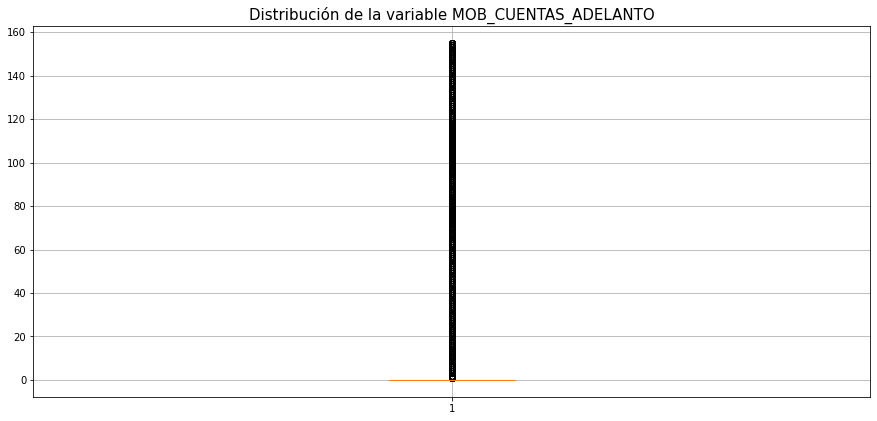

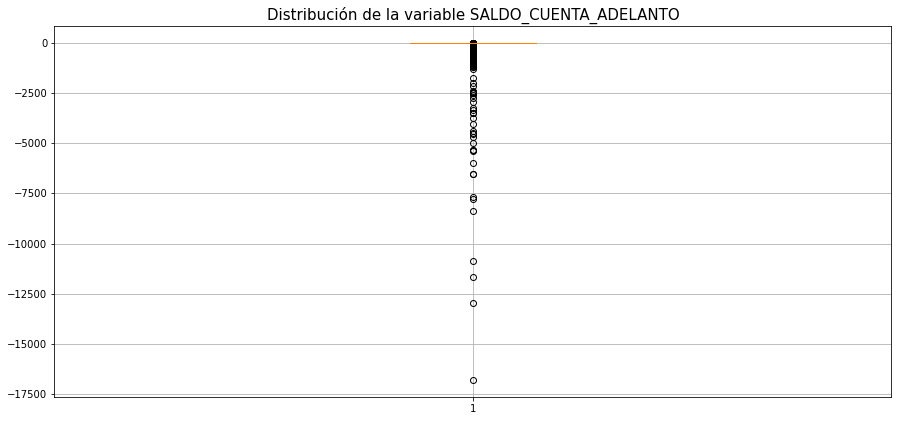

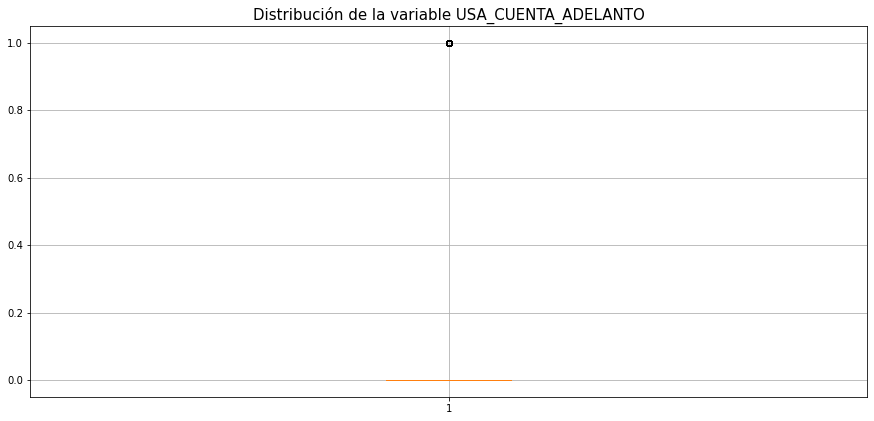

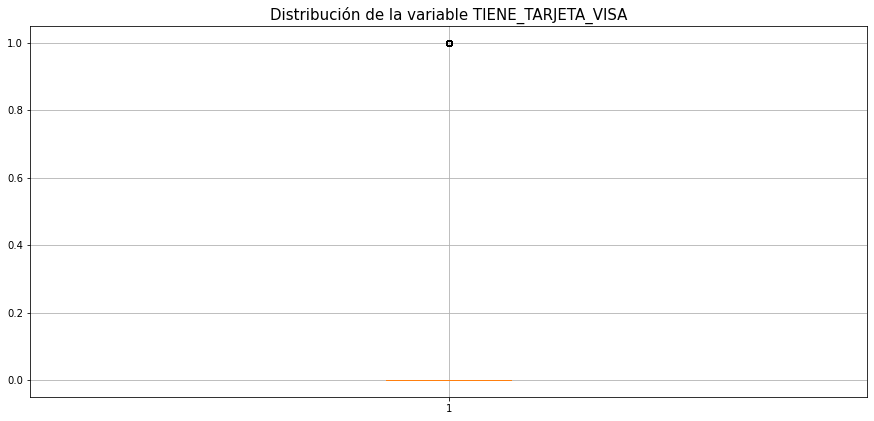

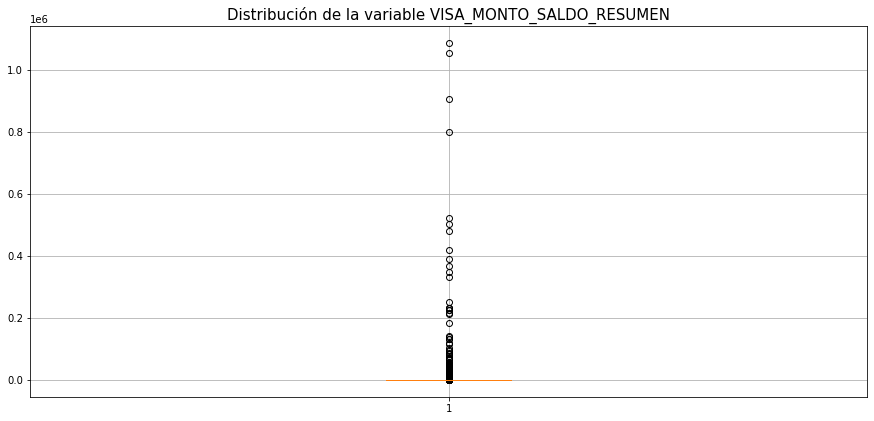

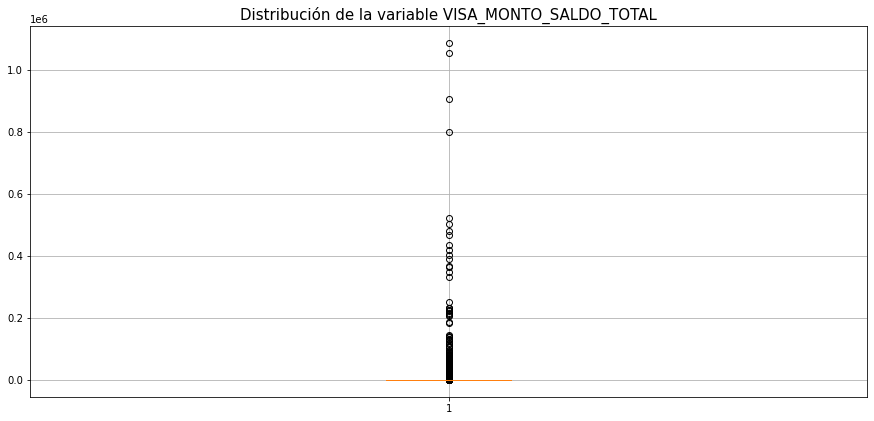

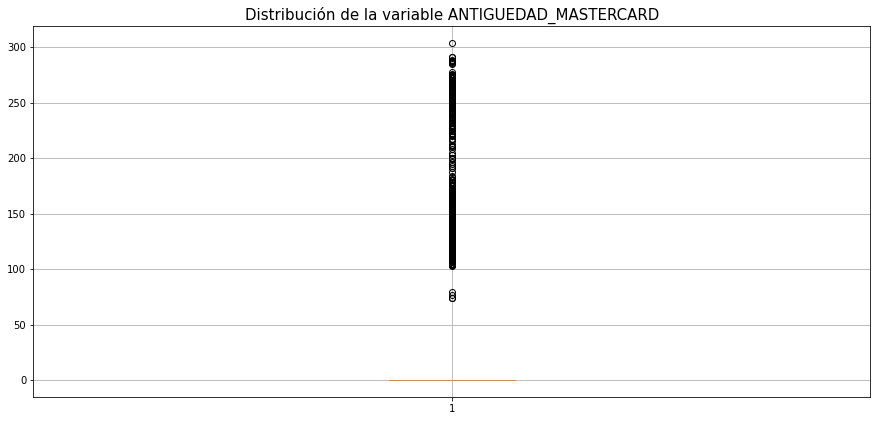

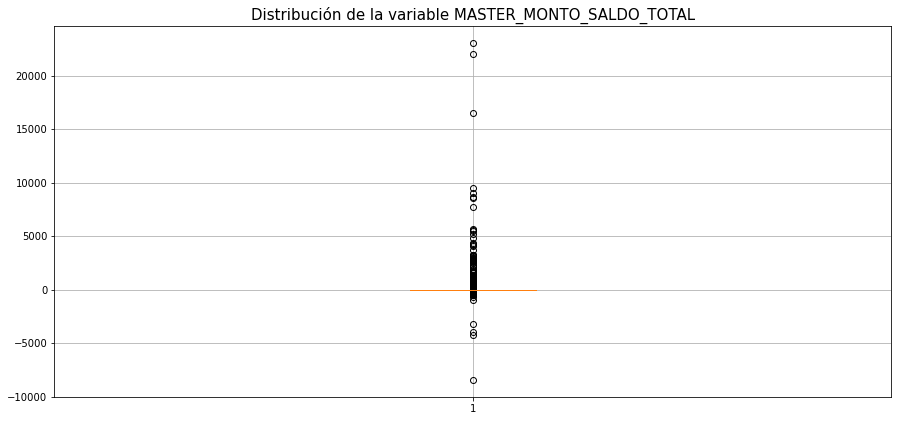

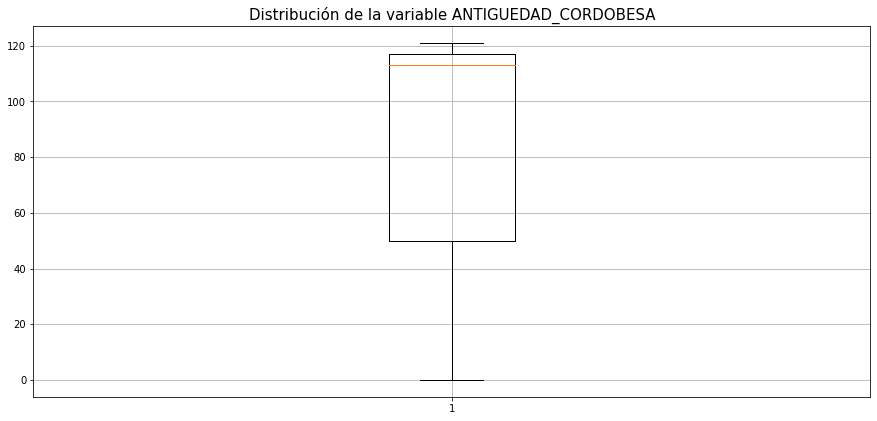

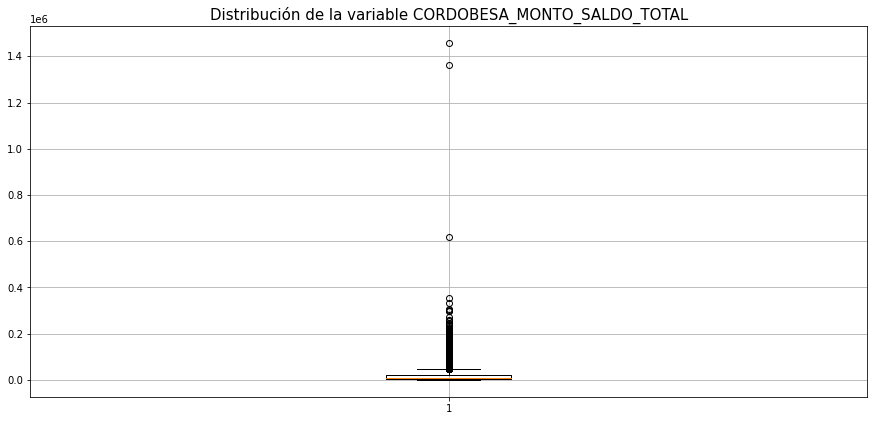

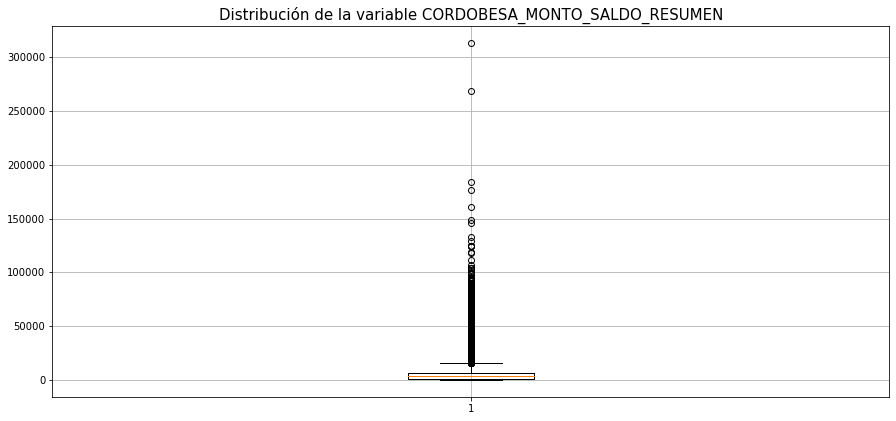

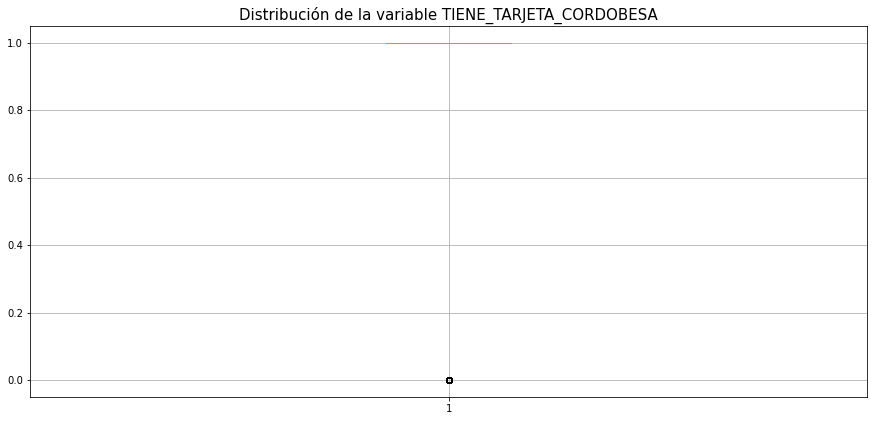

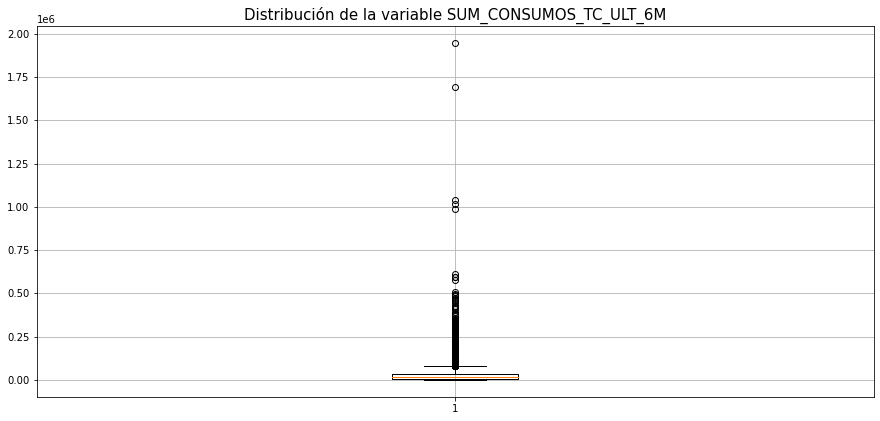

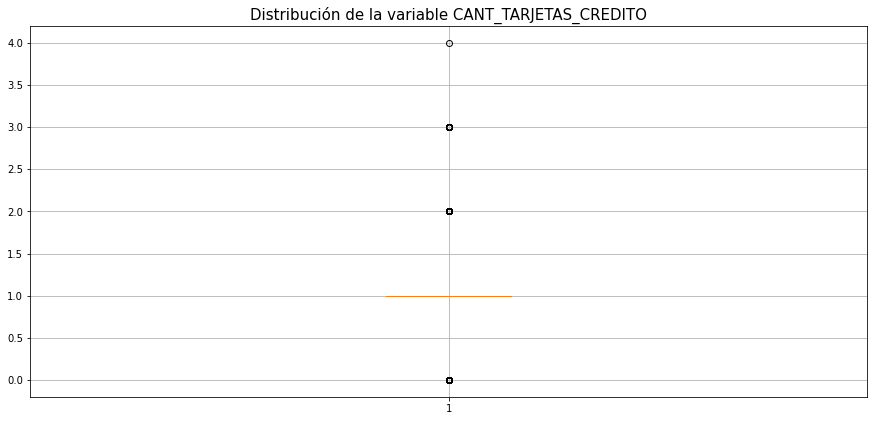

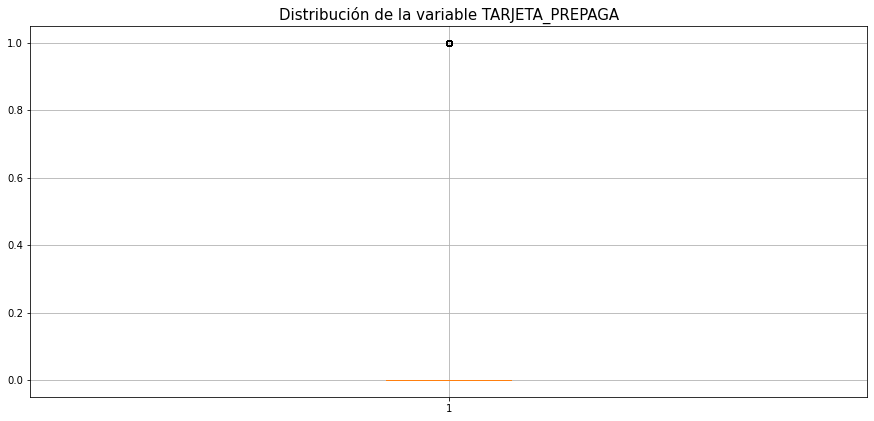

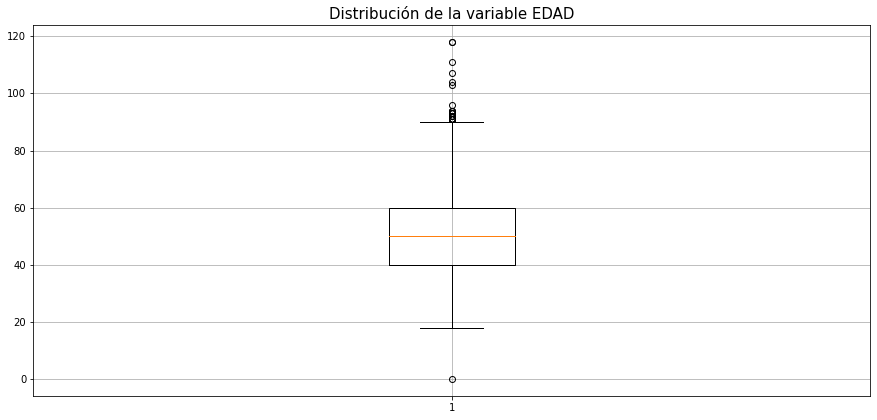

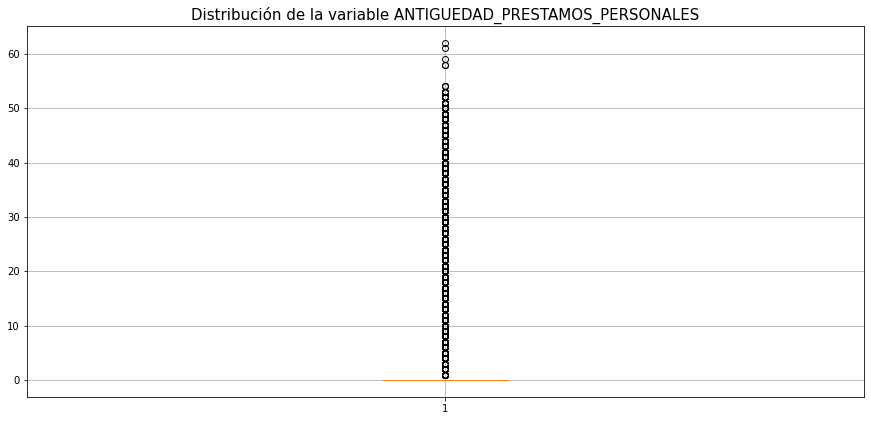

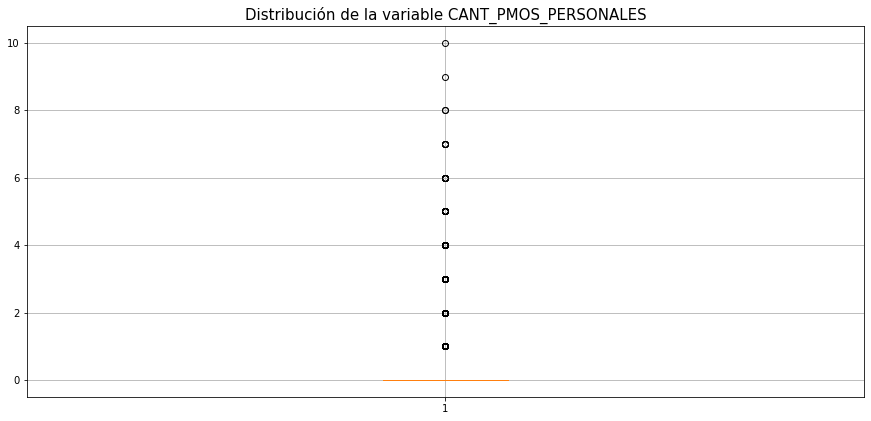

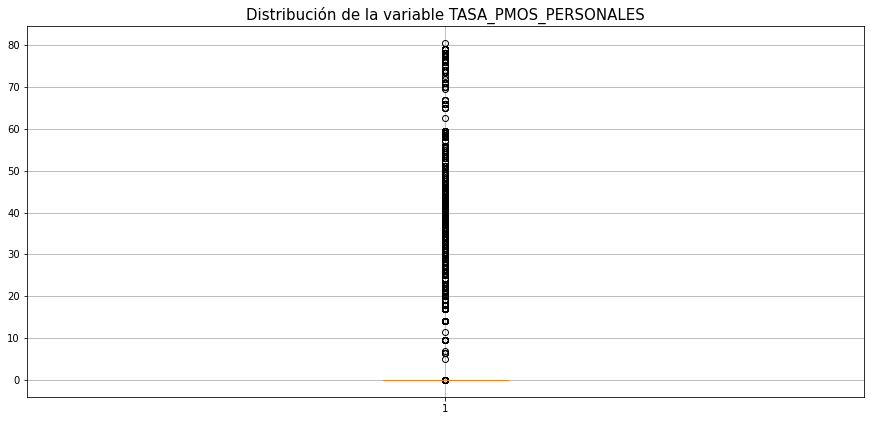

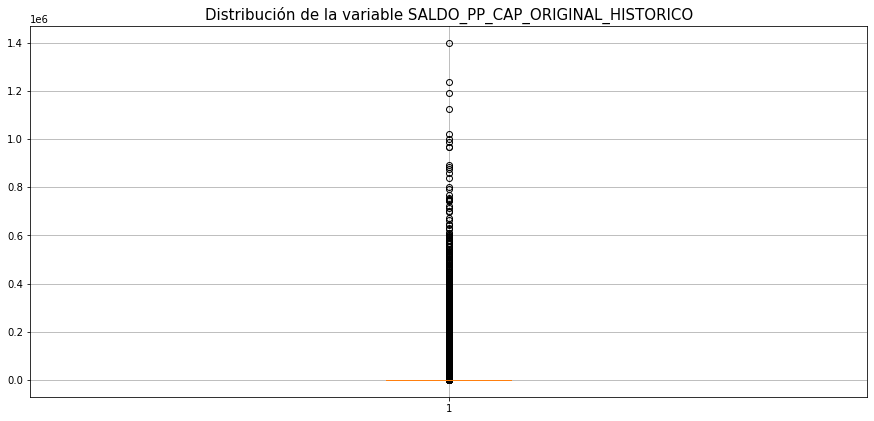

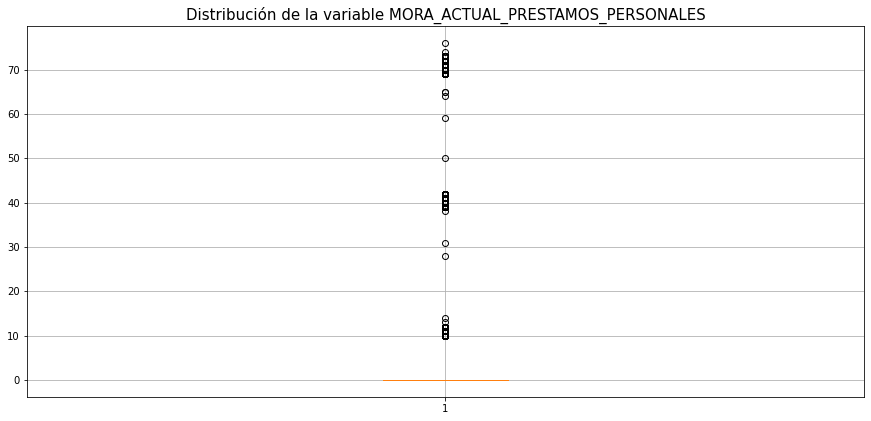

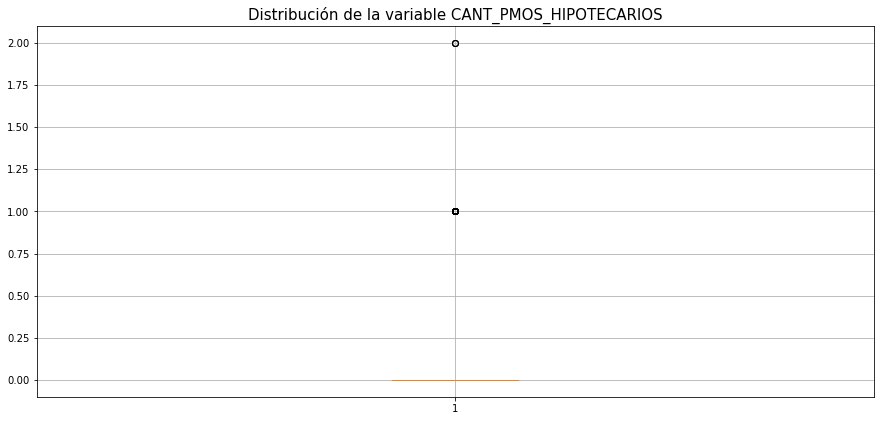

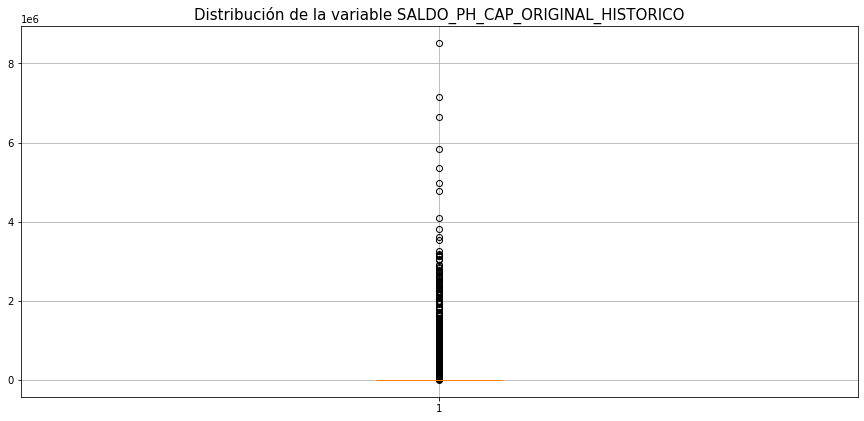

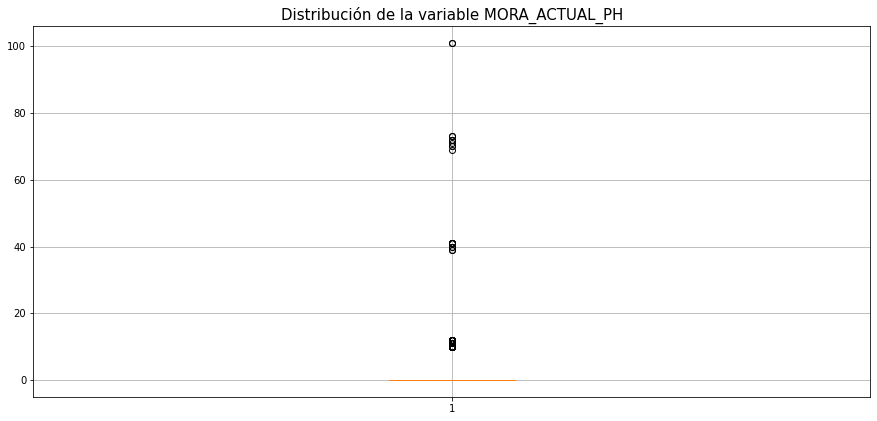

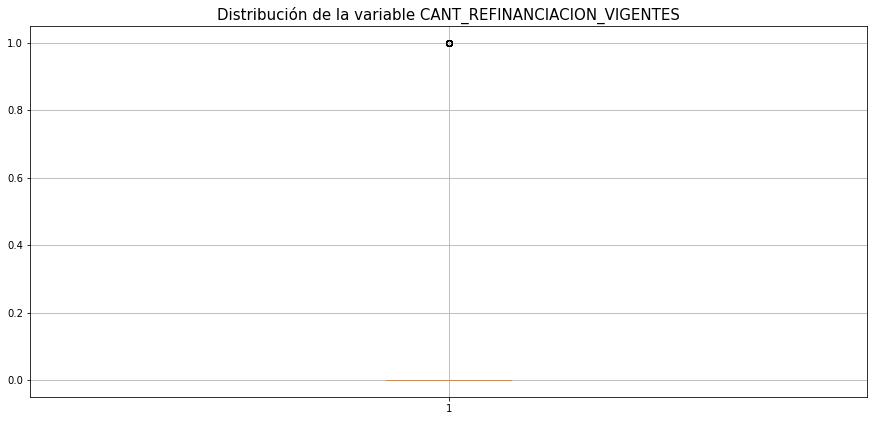

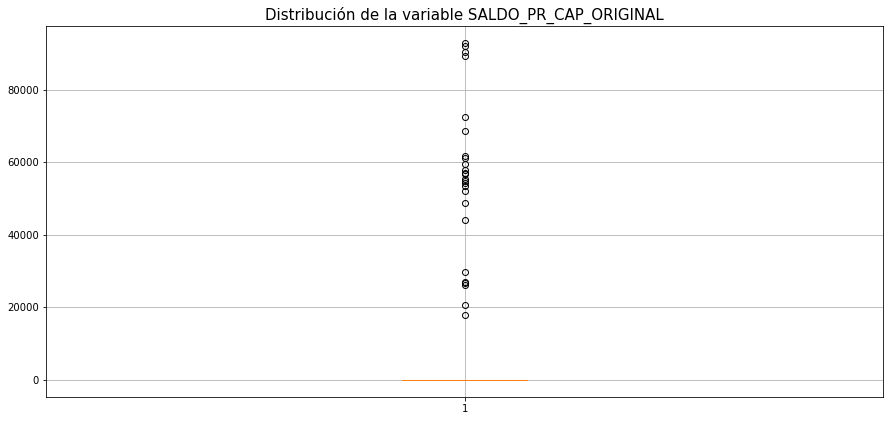

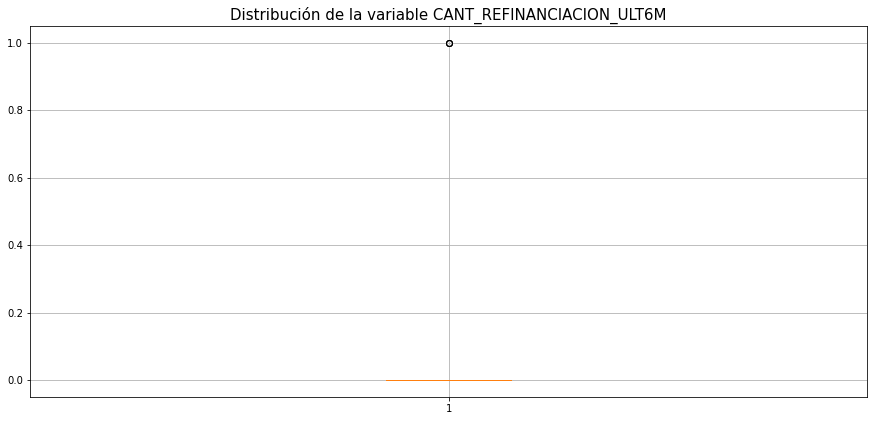

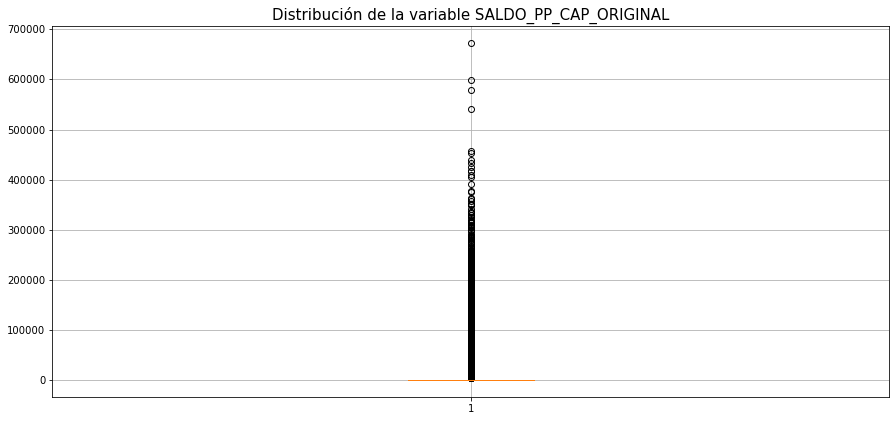

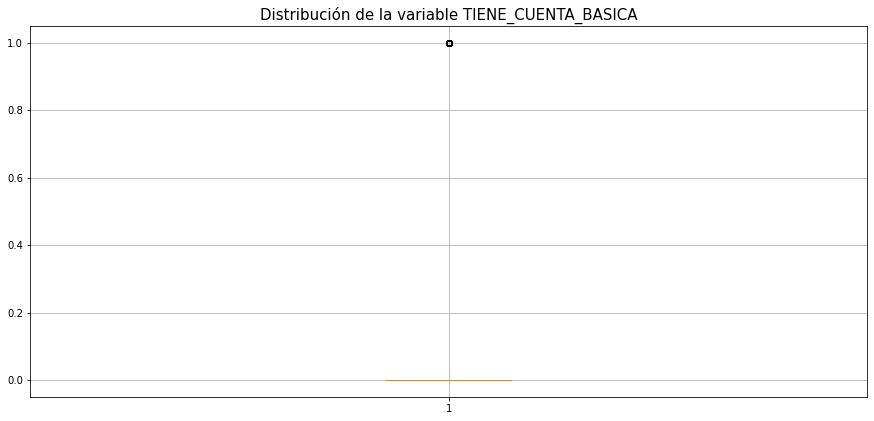

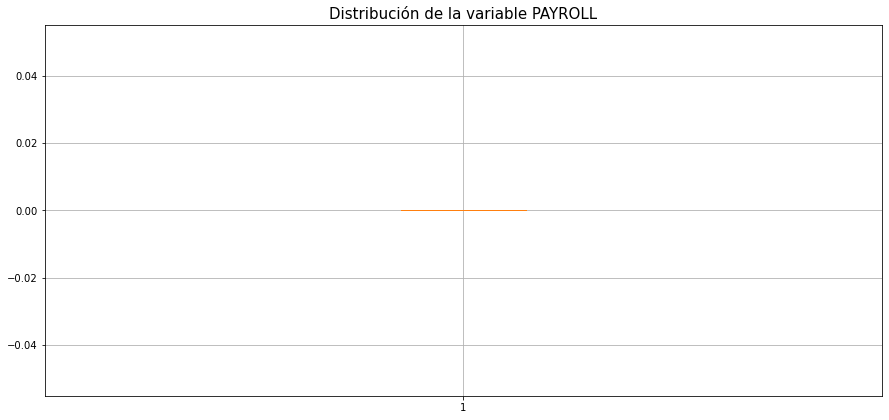

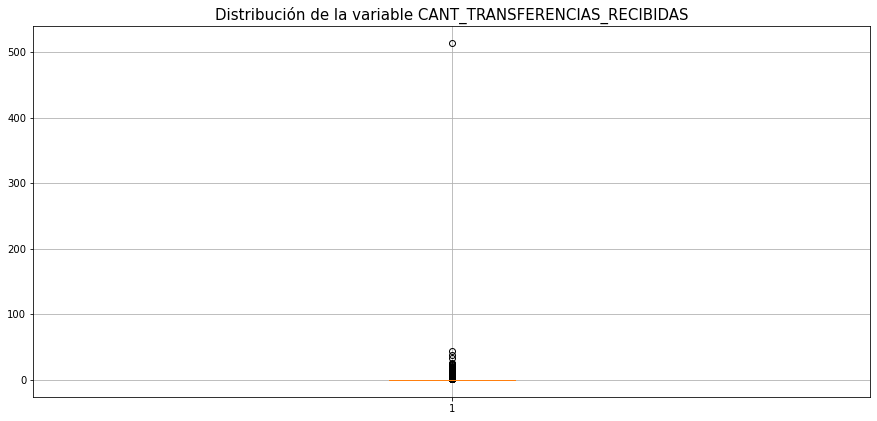

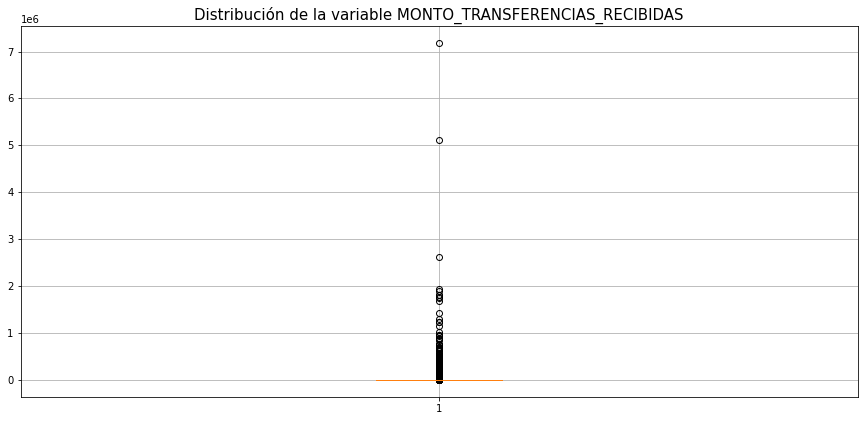

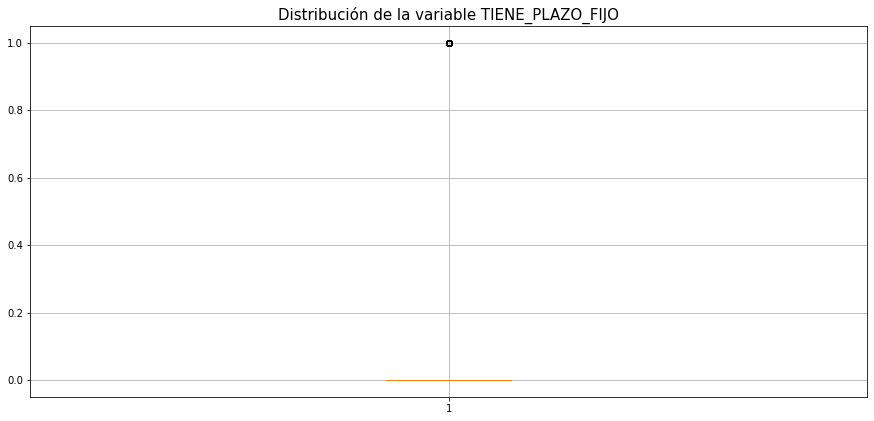

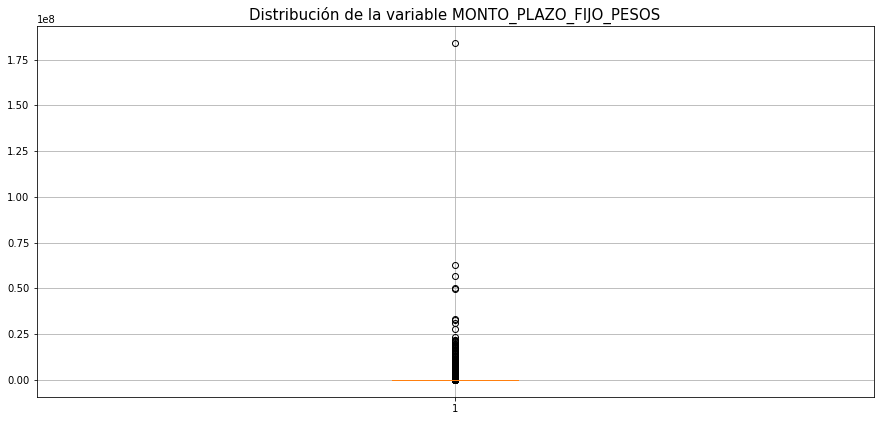

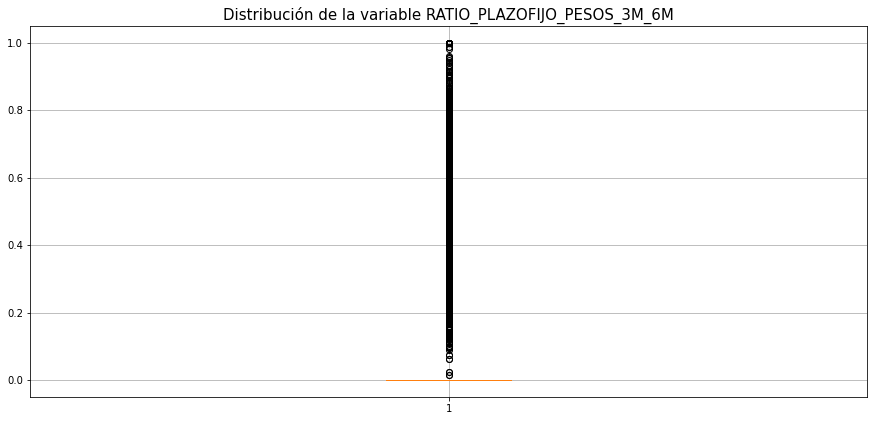

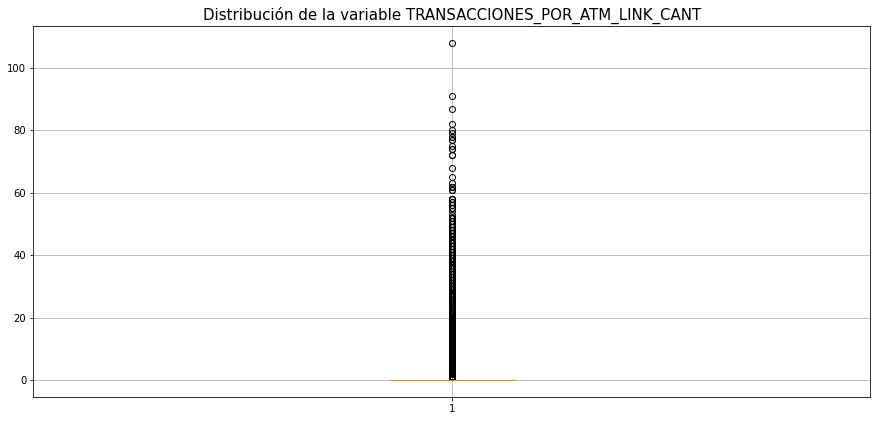

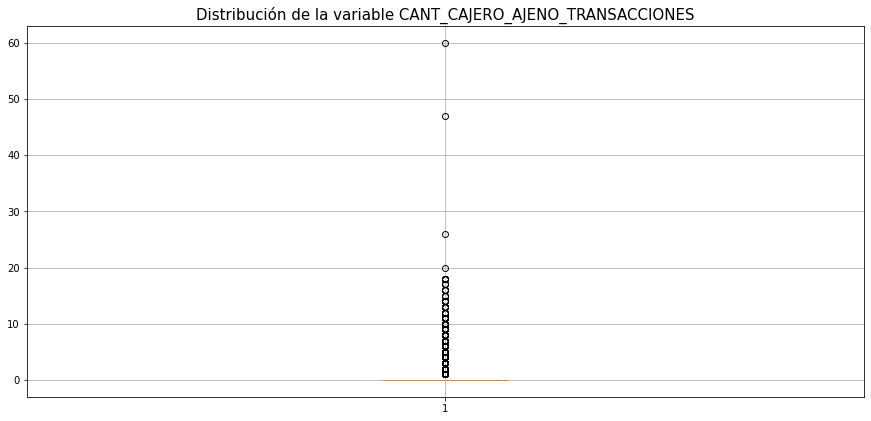

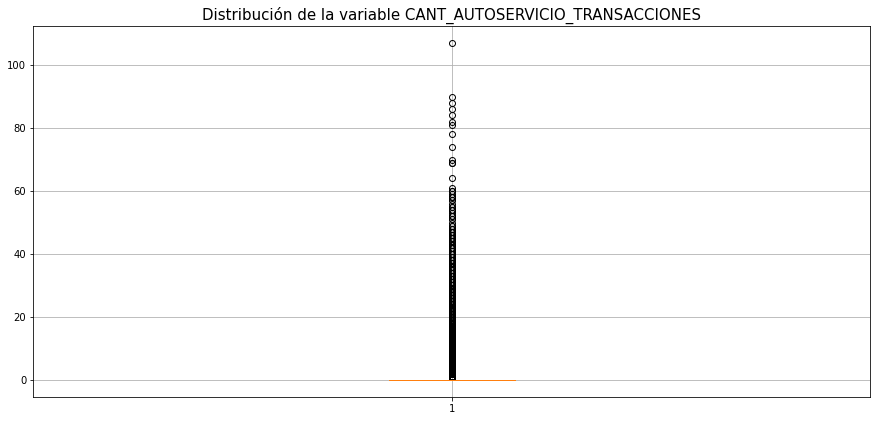

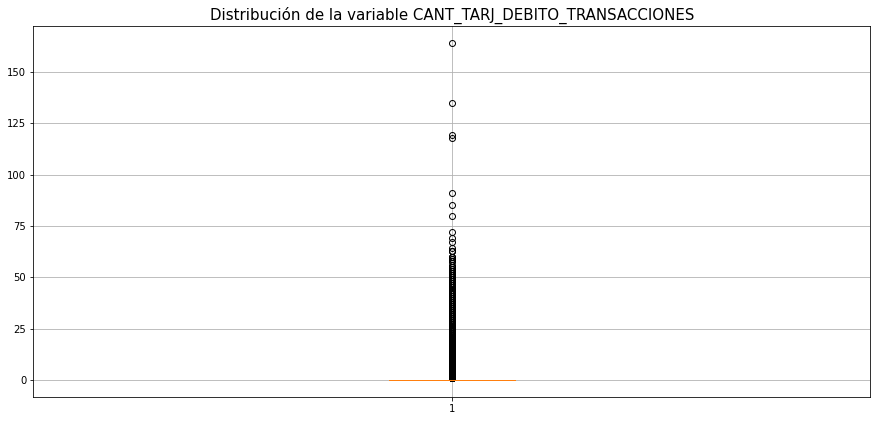

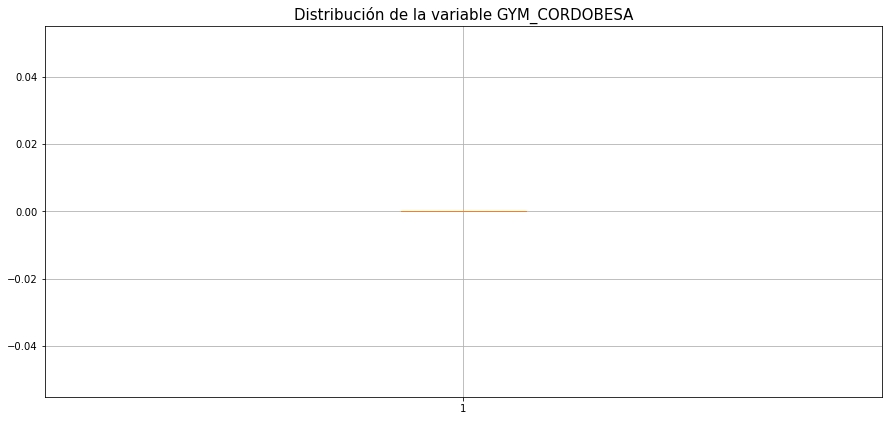

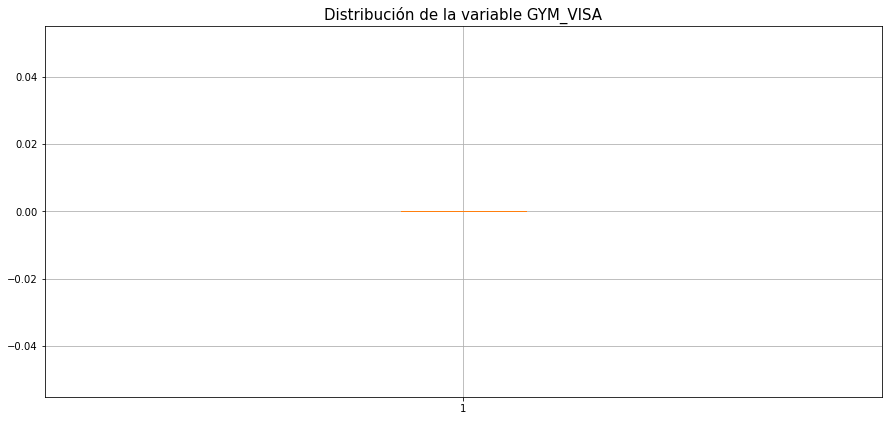

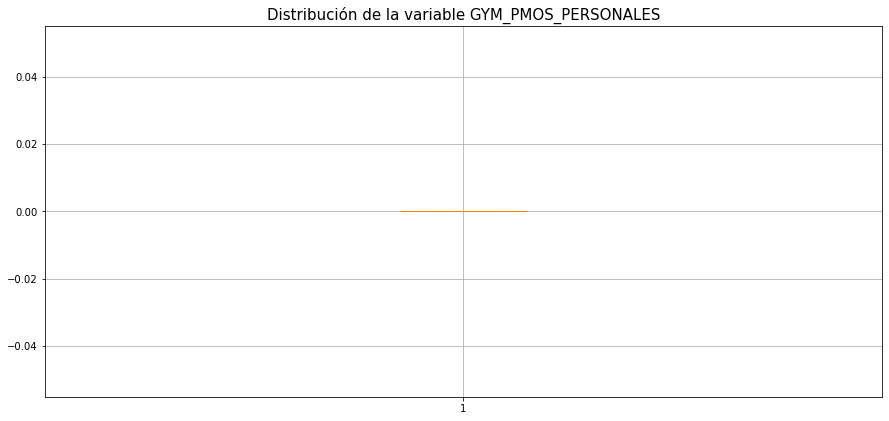

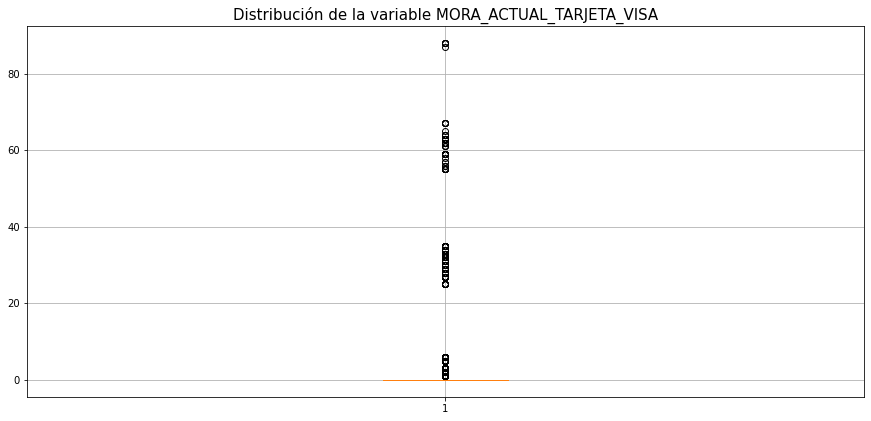

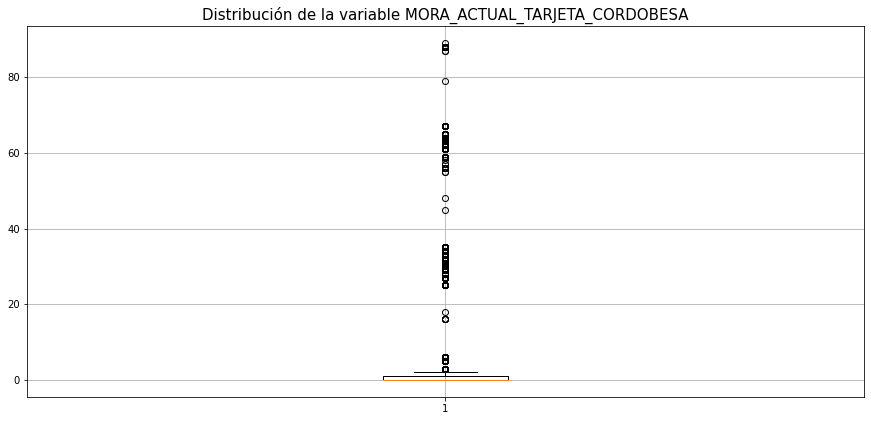

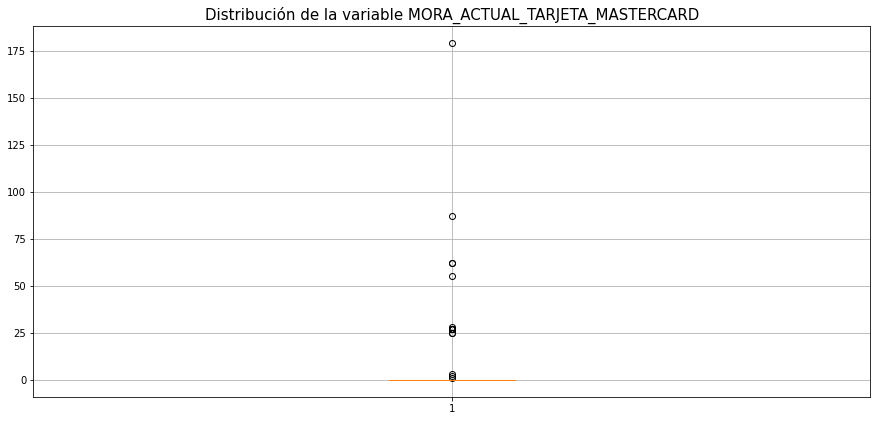

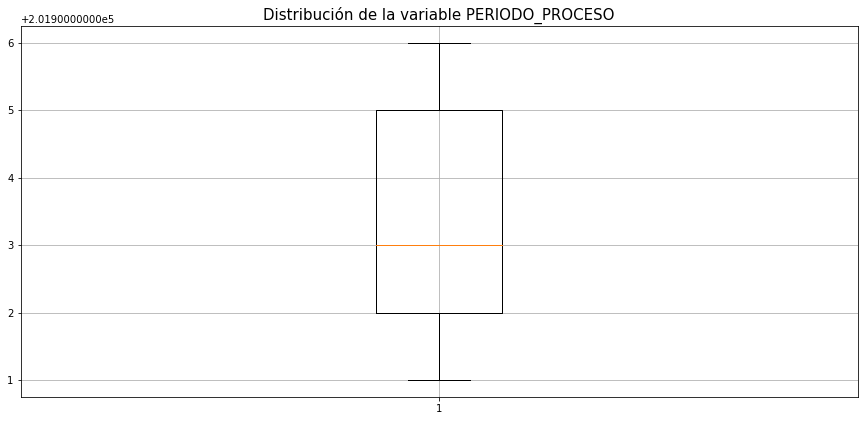

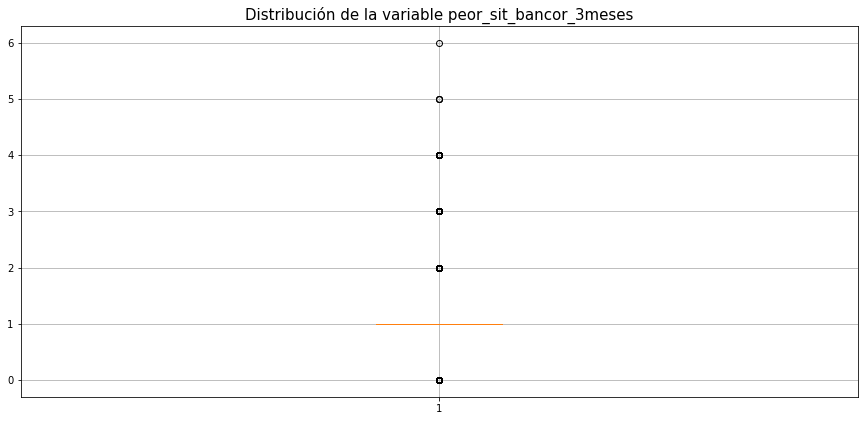

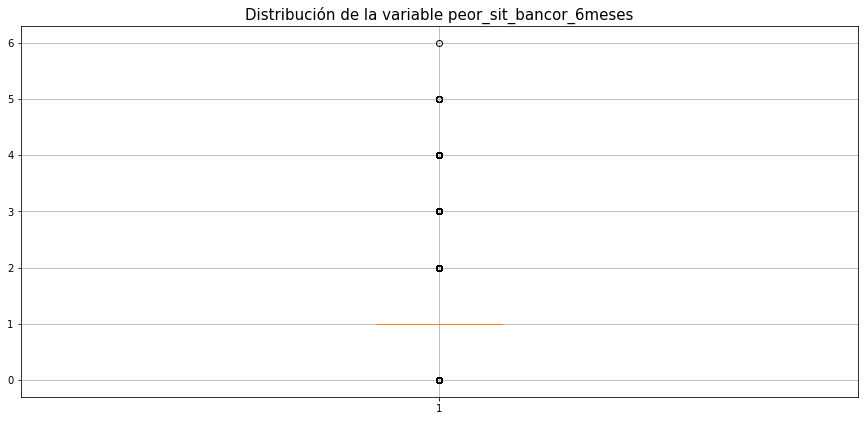

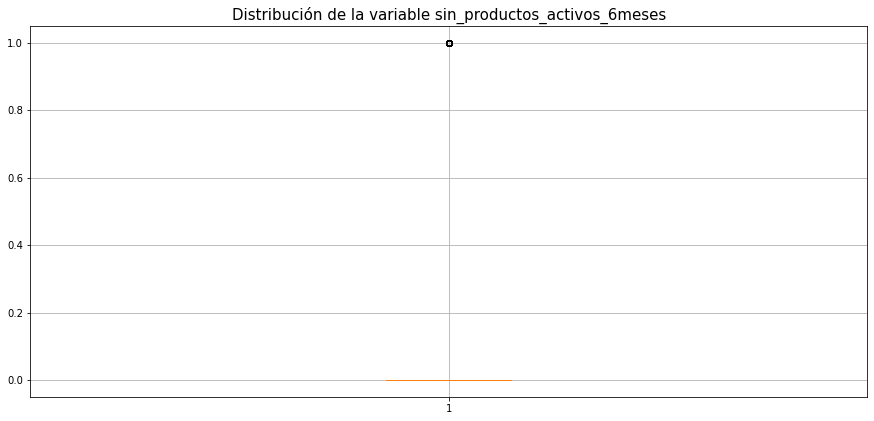

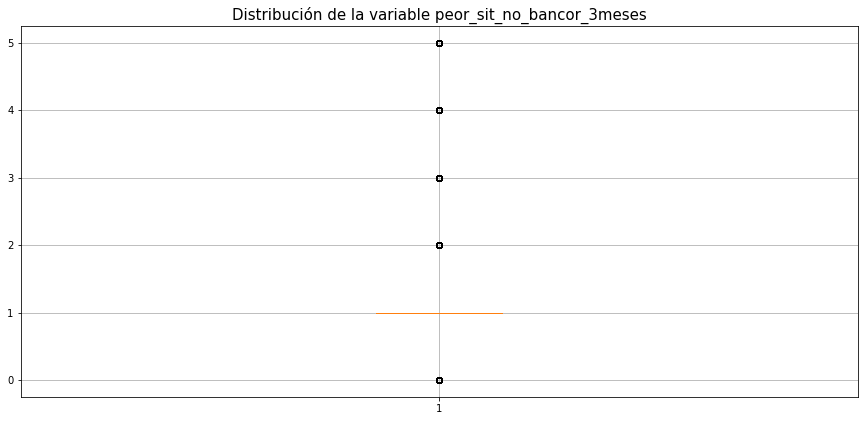

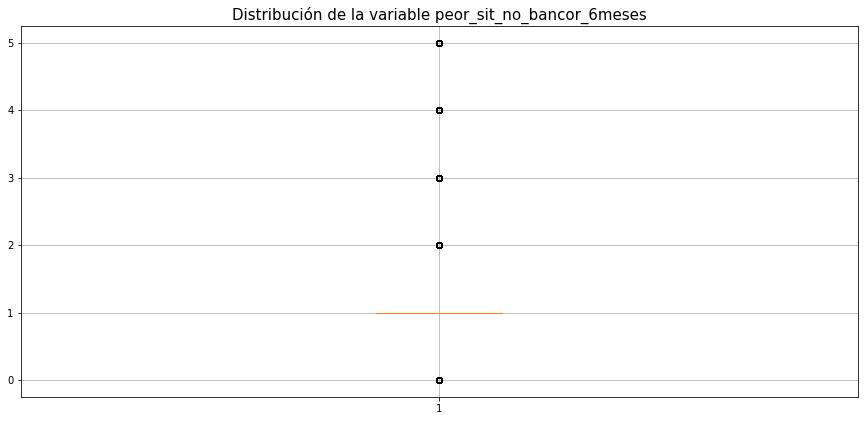

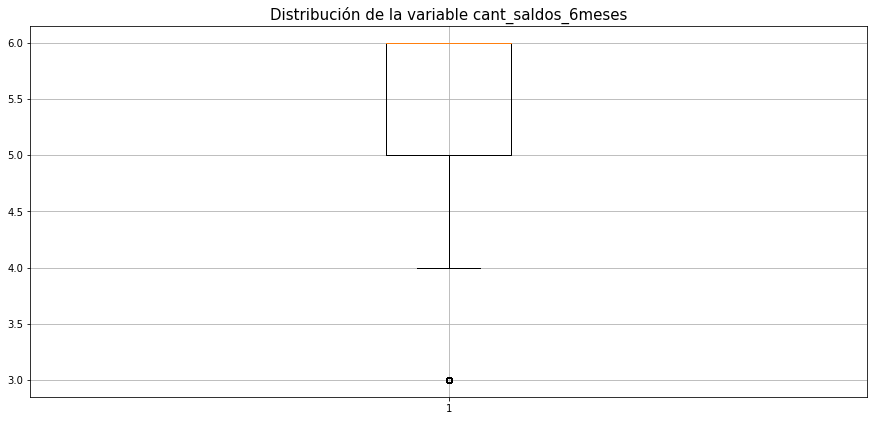

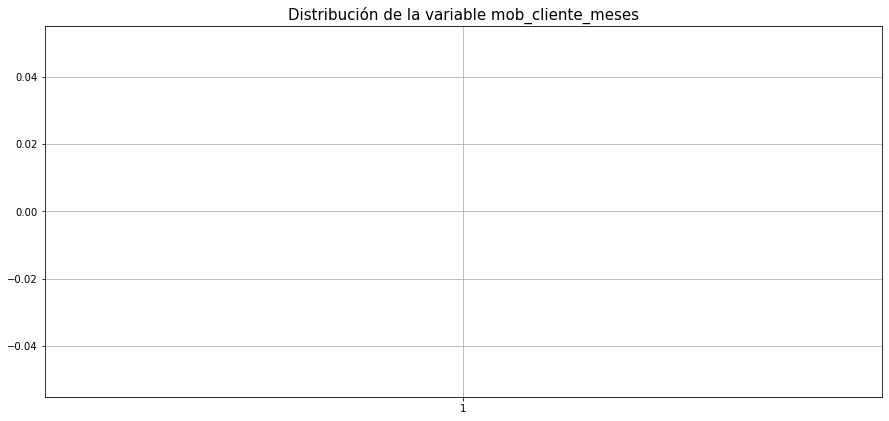

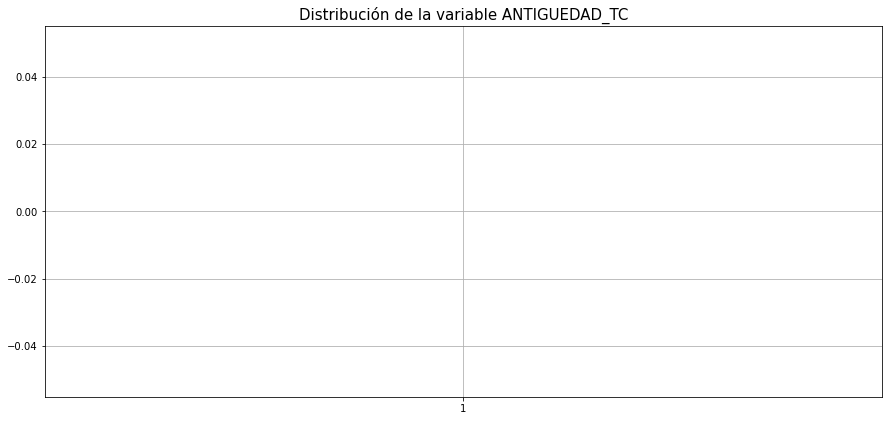

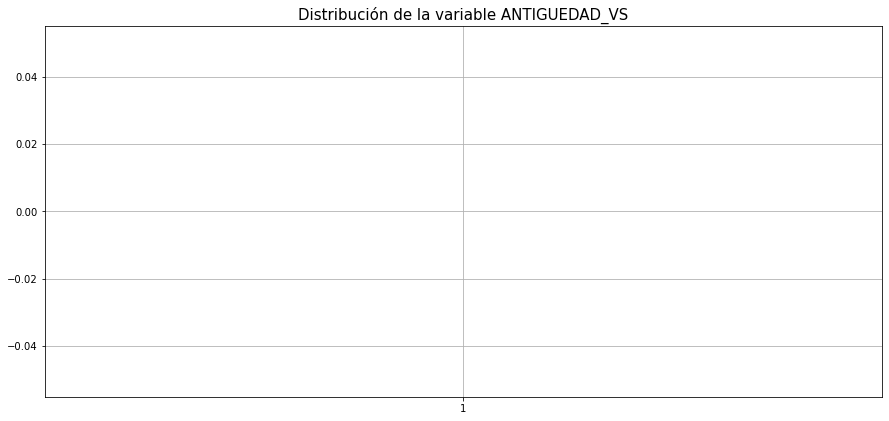

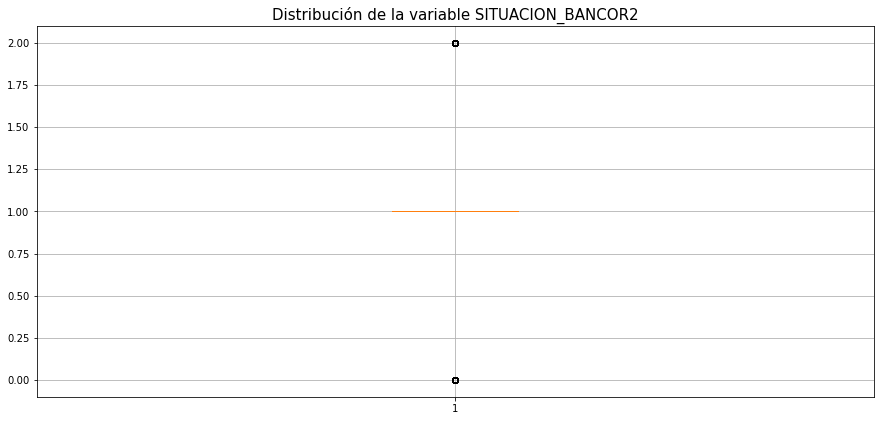

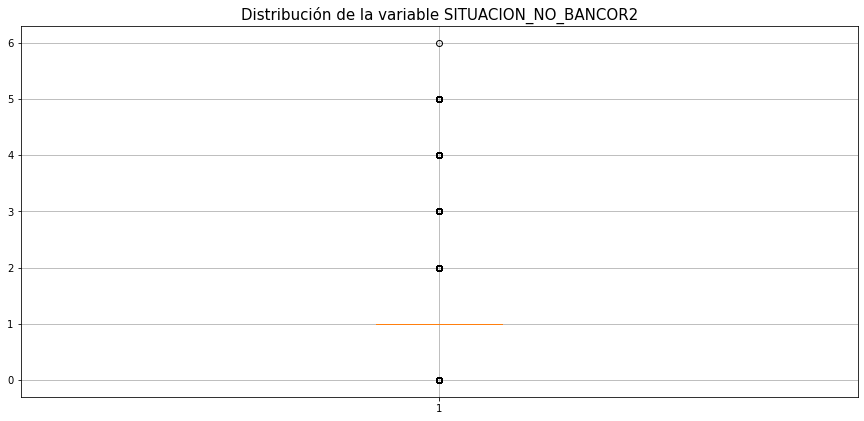

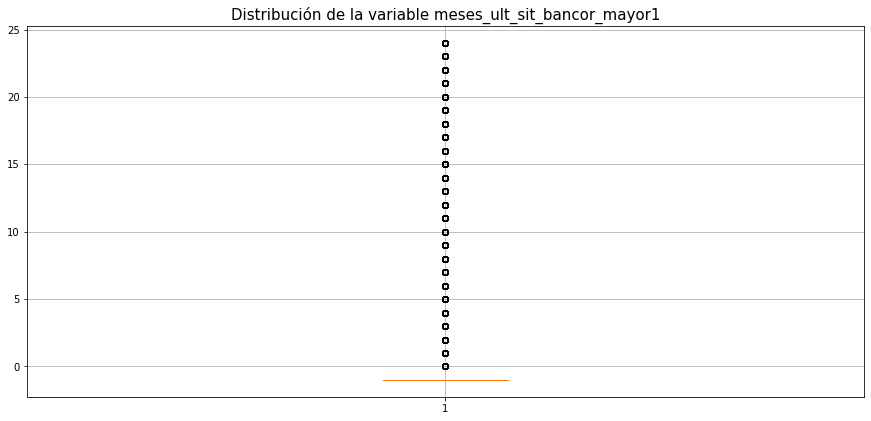

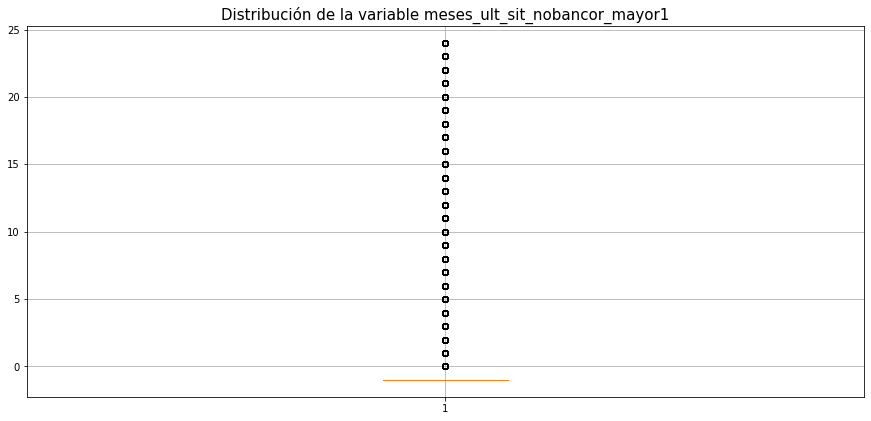

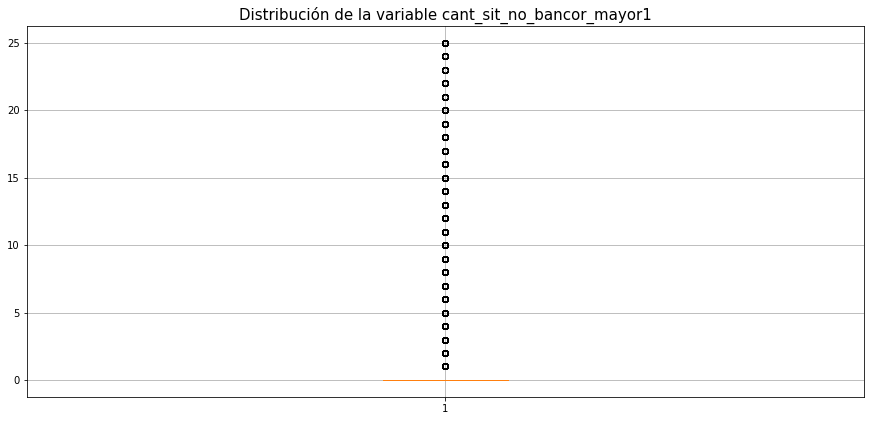

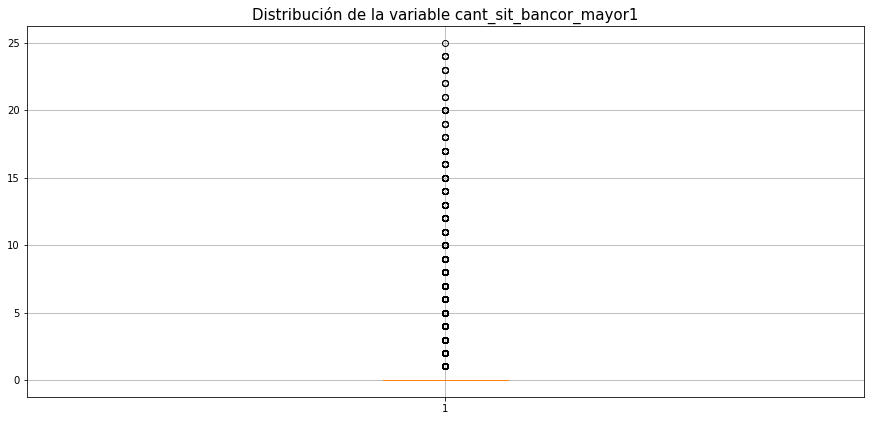

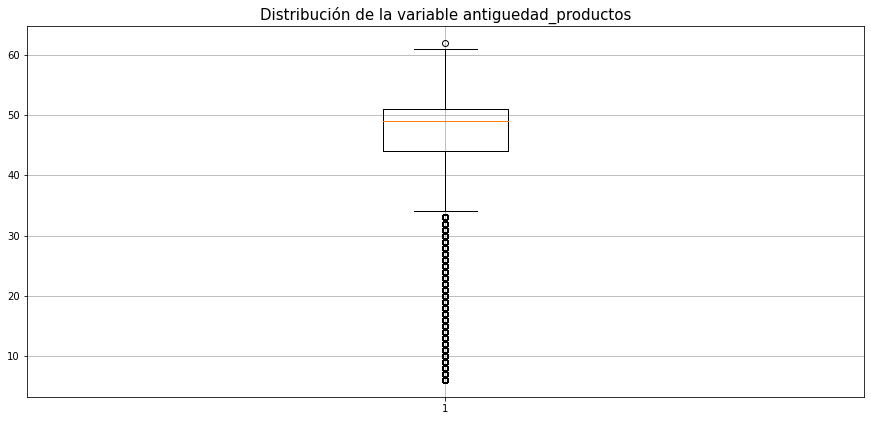

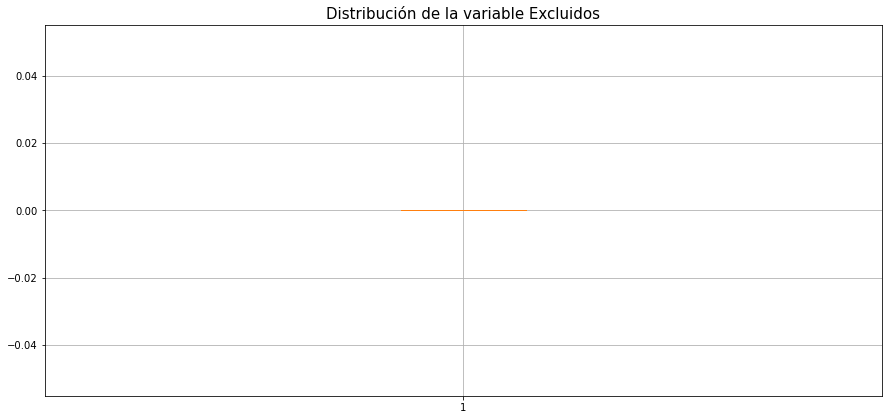

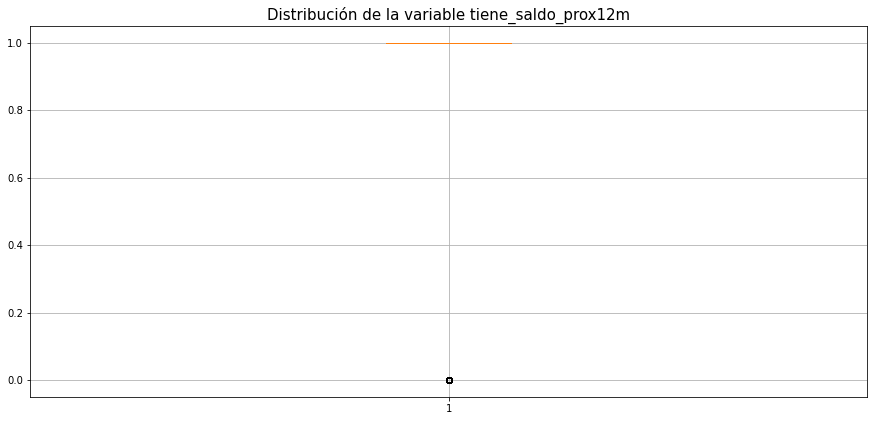

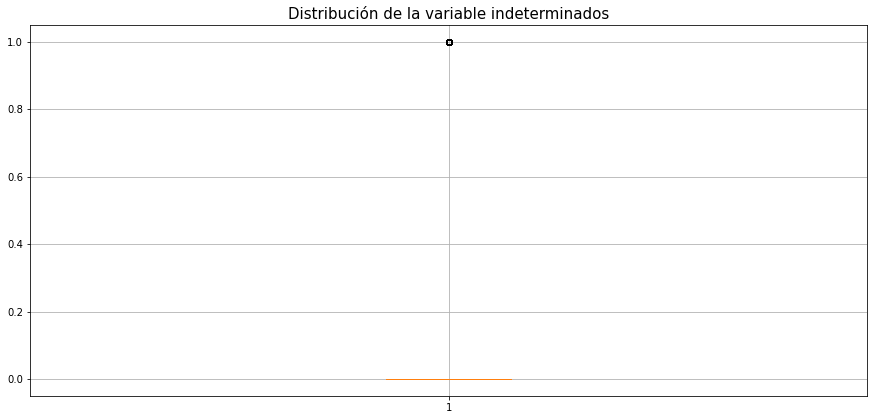

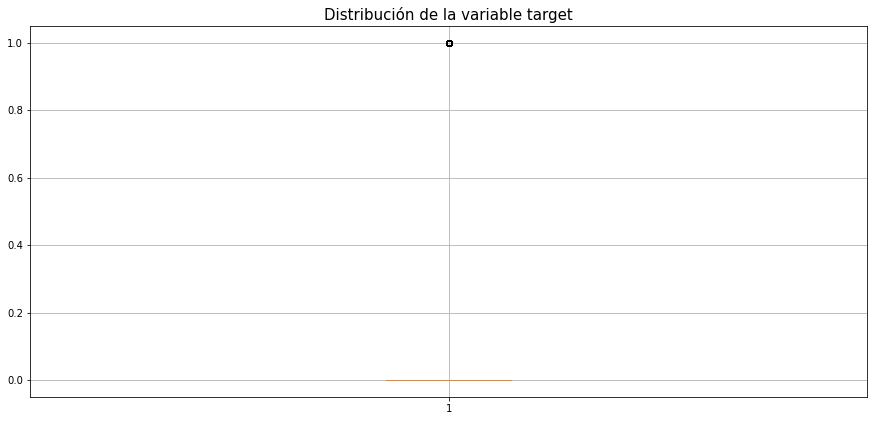

In [13]:
for var in numbase : 
    plt.figure(figsize=(15,15))
    plt.subplot(2, 1, 1)
    plt.boxplot(data=base, x= var)
    plt.title(f'Distribución de la variable {var}' ,size='15')
    plt.grid(True)  

    plt.show()

In [14]:
#VARIABLES PARA REALIZAR ANALISIS DESCRIPTIVO POR HISTOGRAMA 

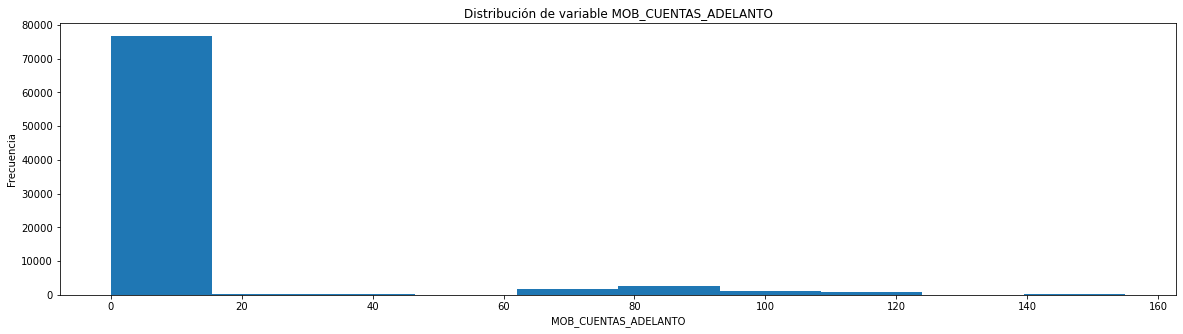

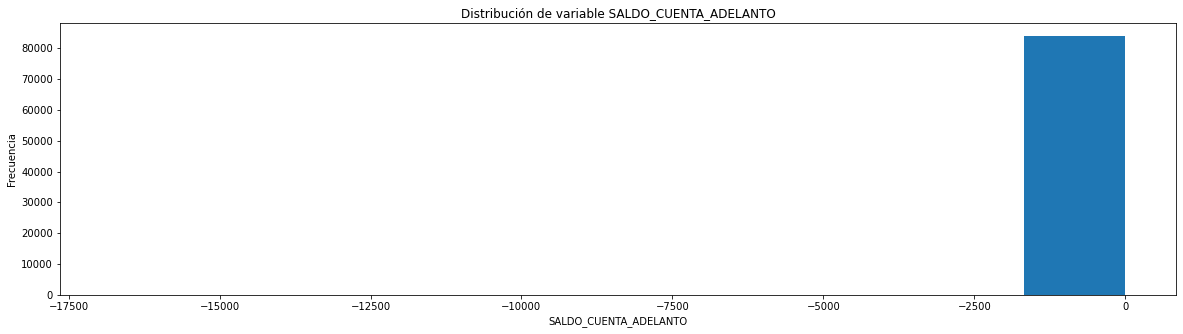

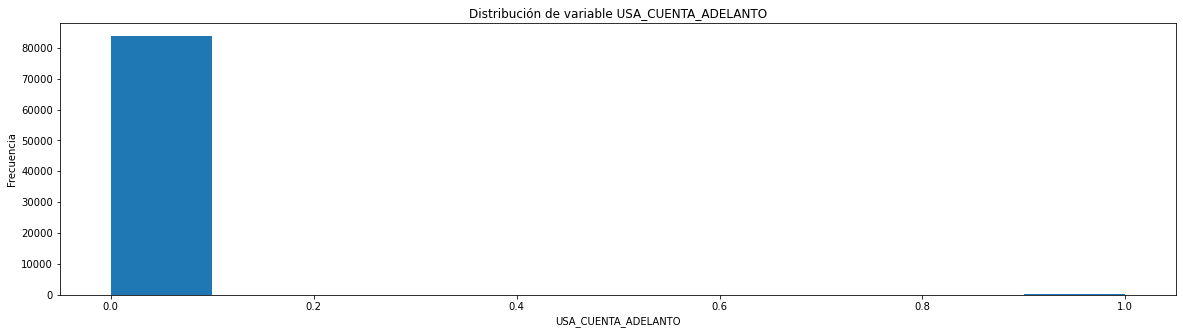

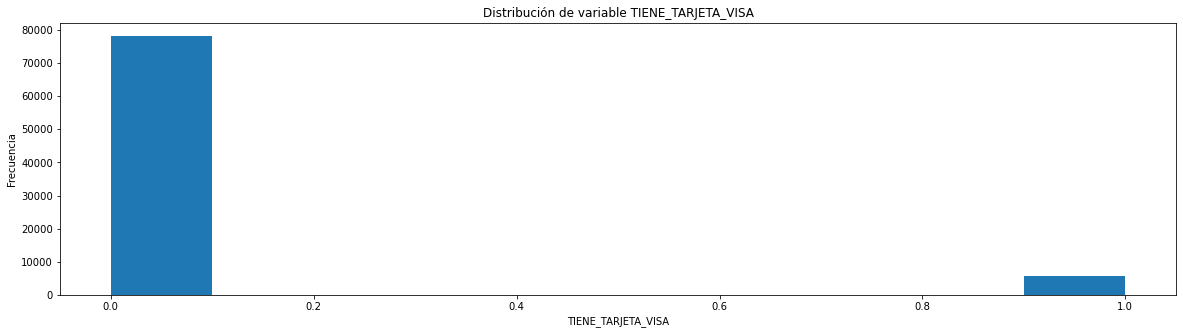

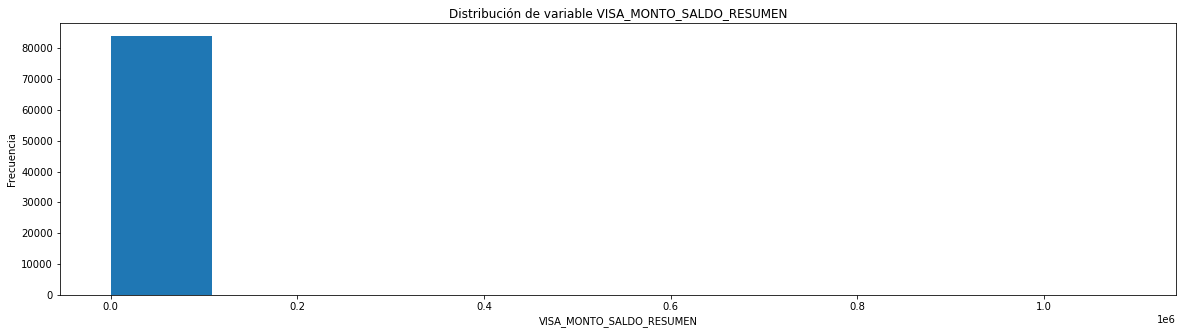

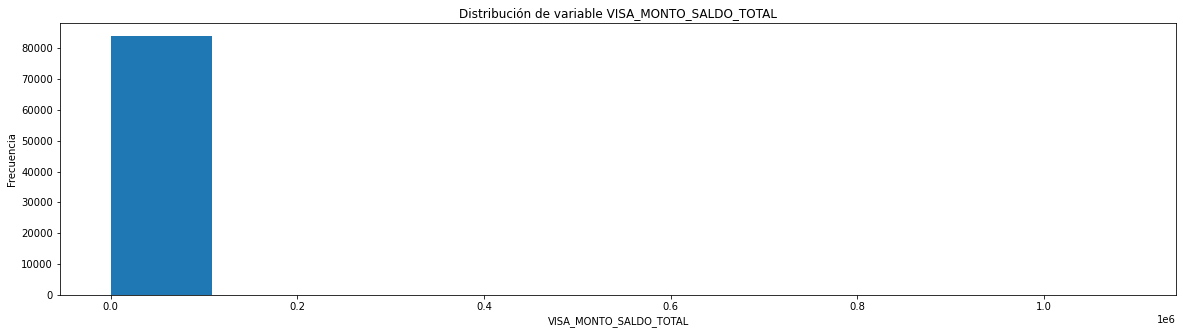

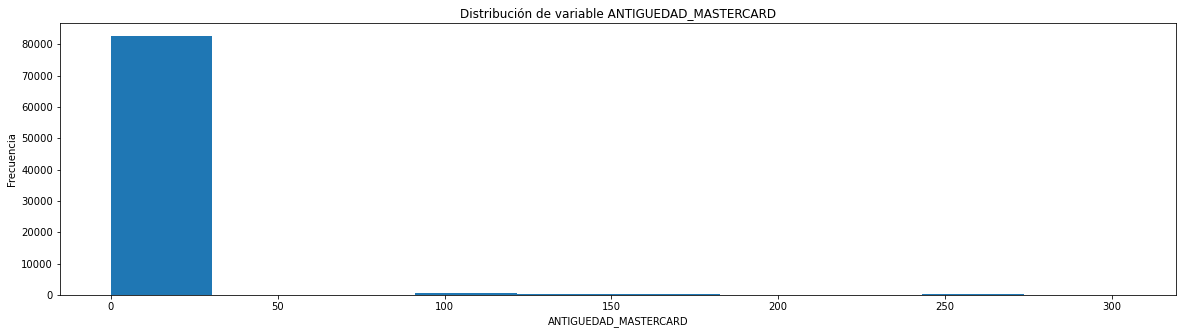

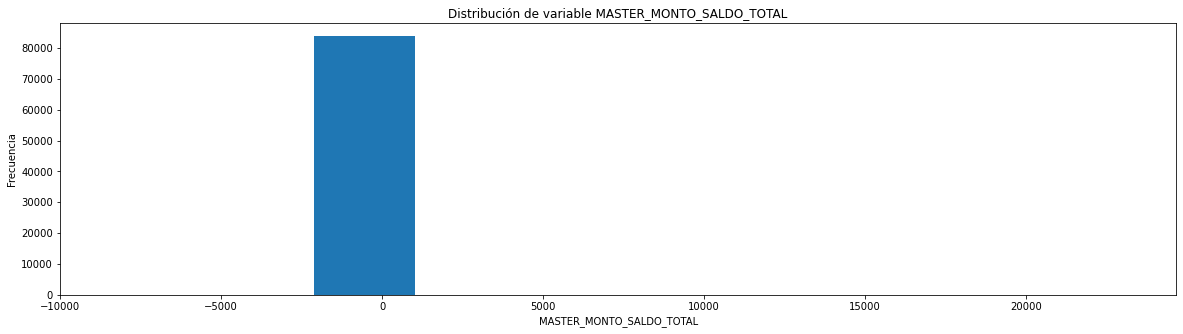

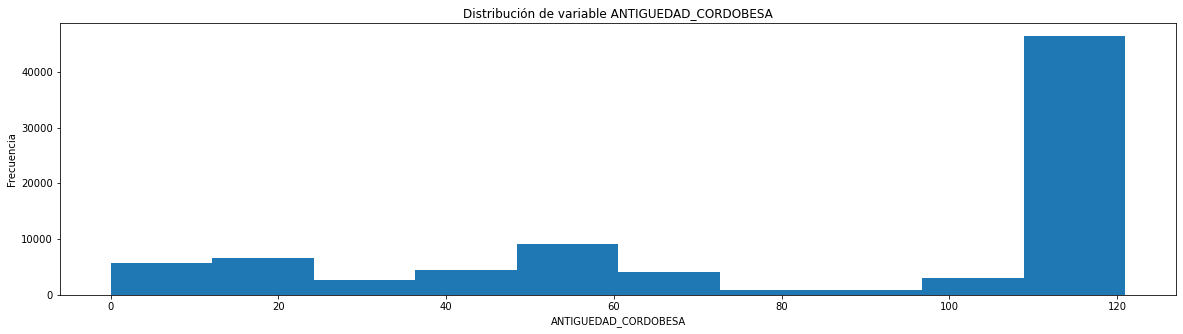

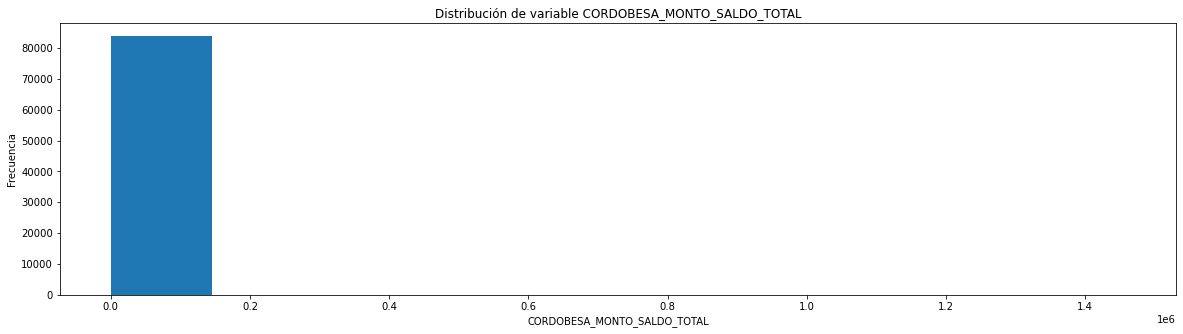

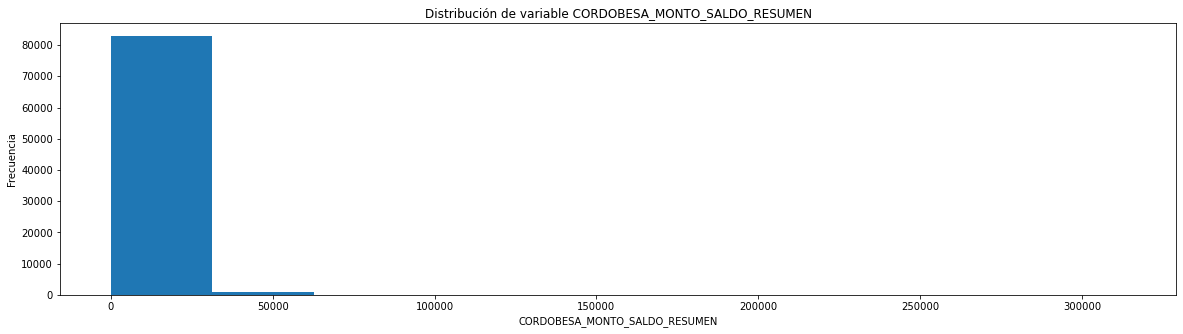

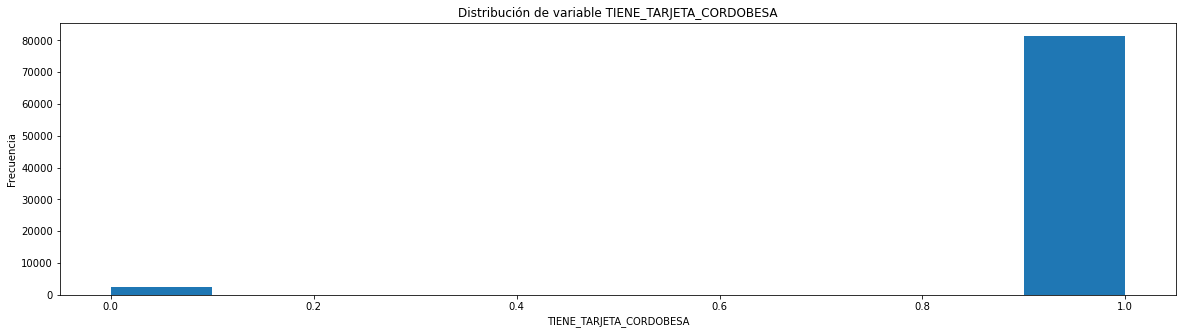

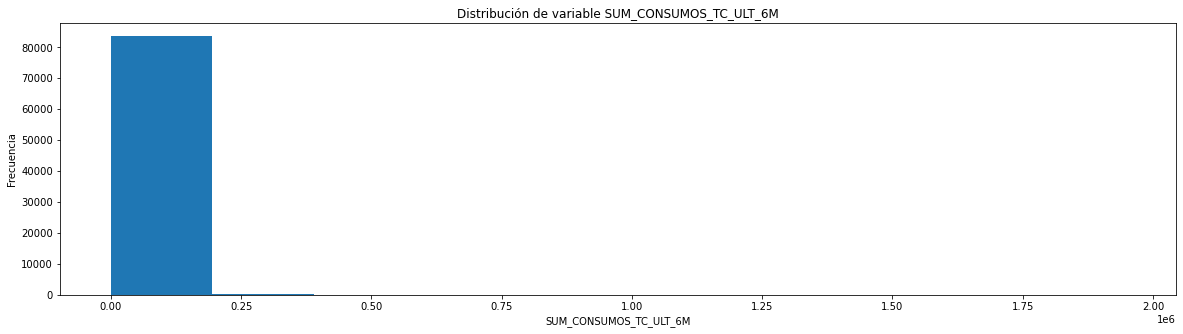

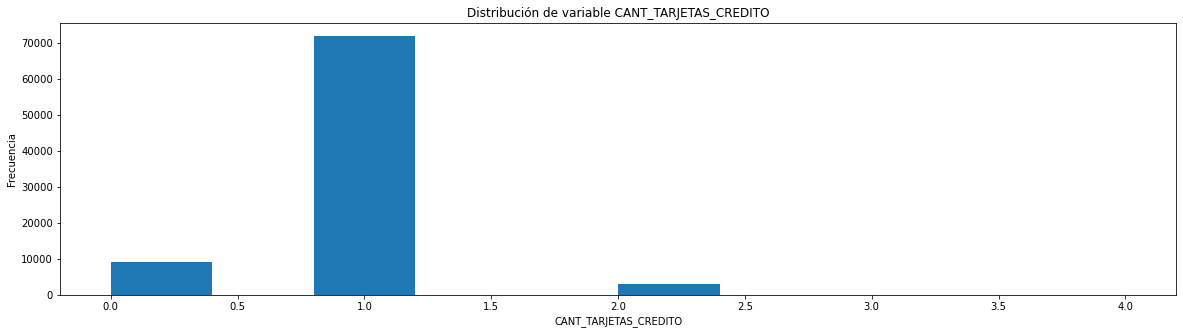

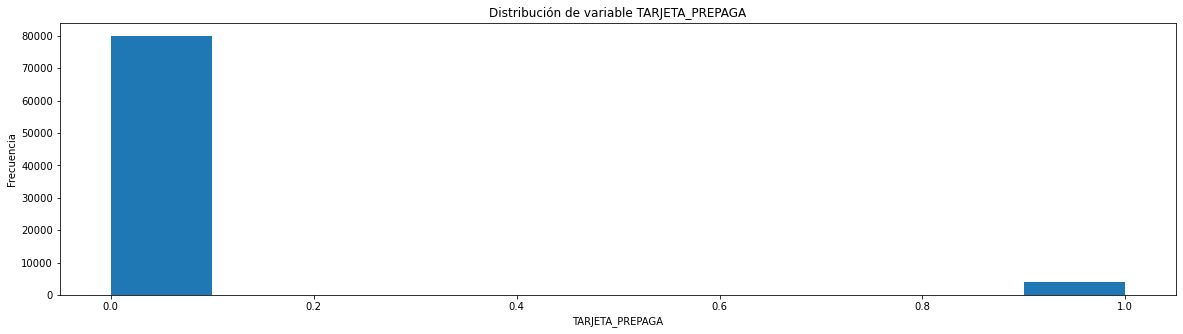

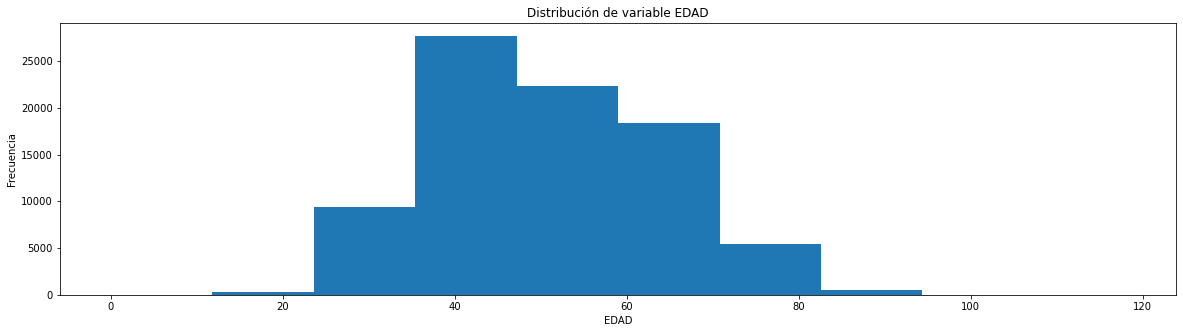

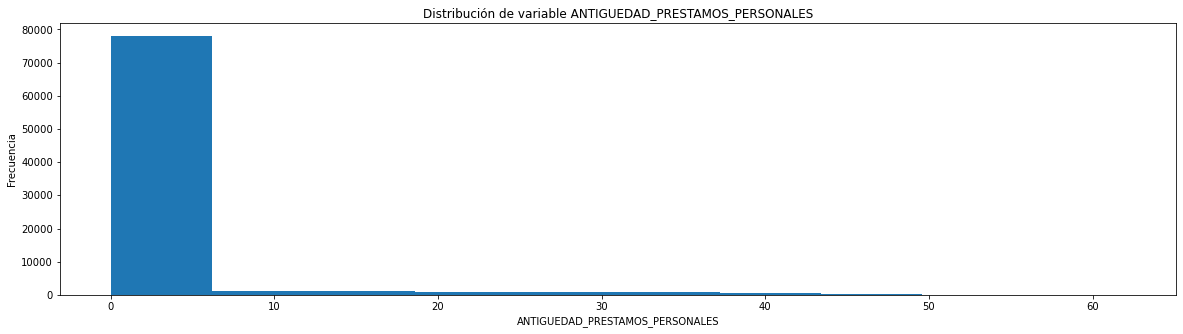

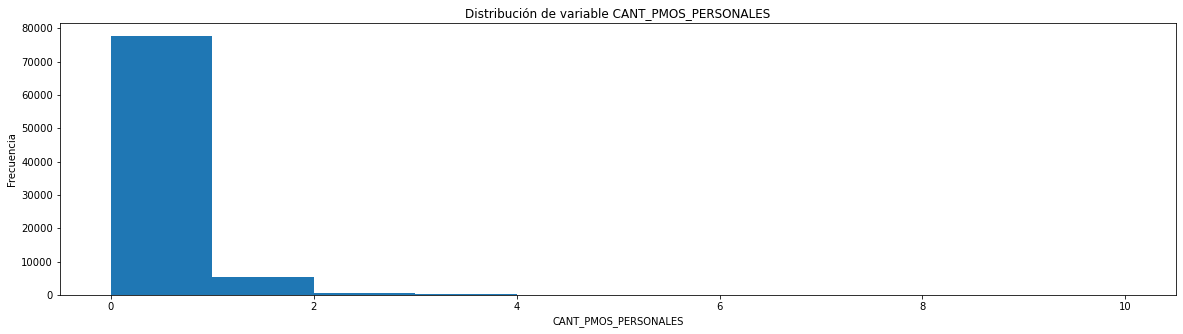

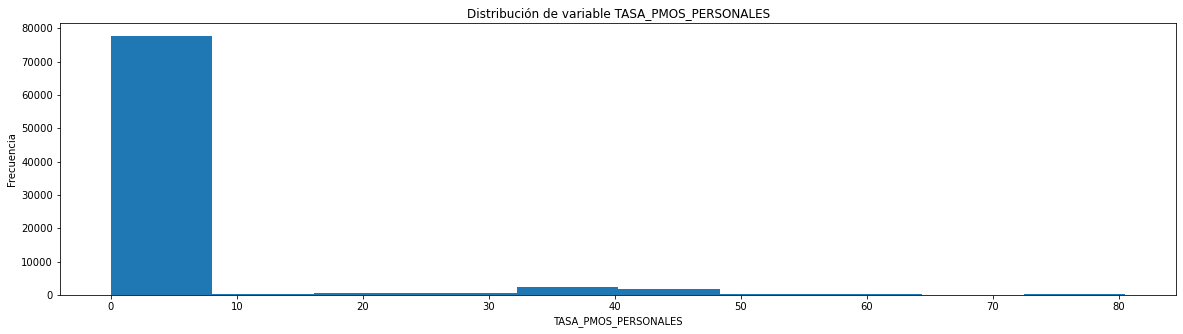

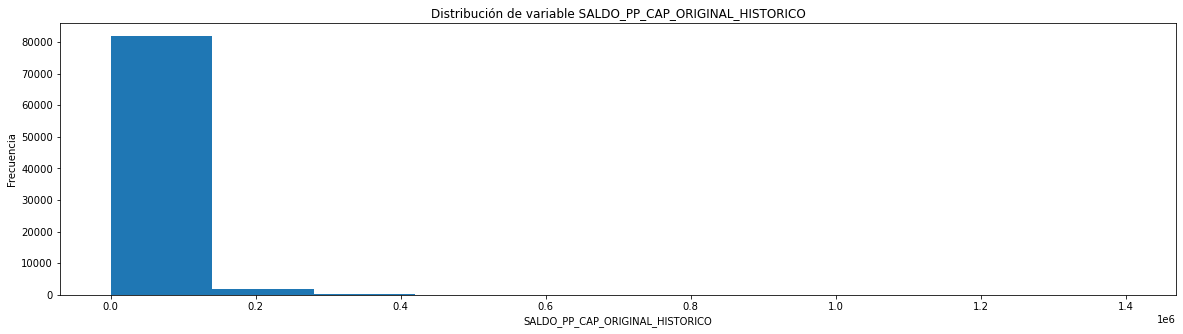

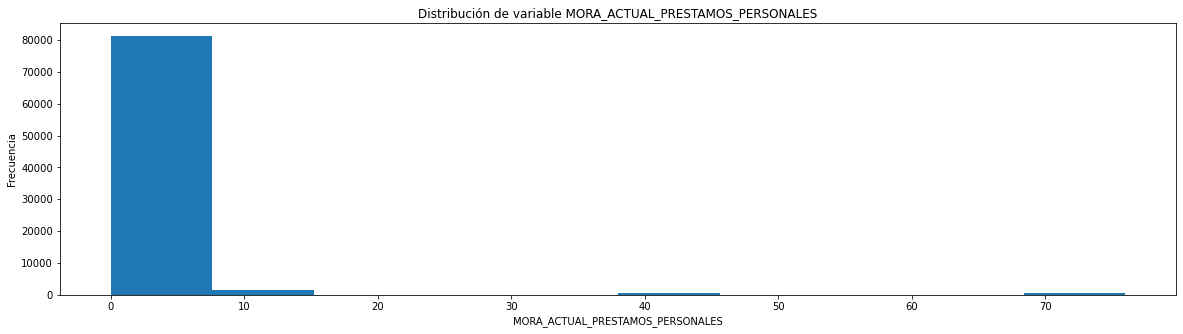

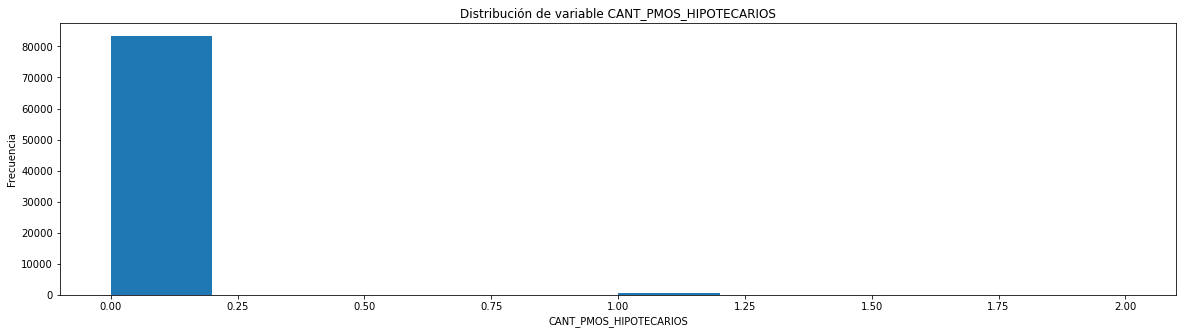

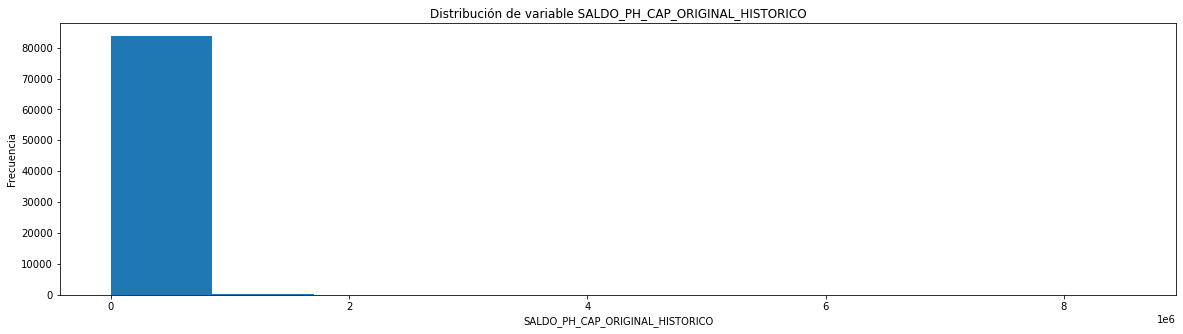

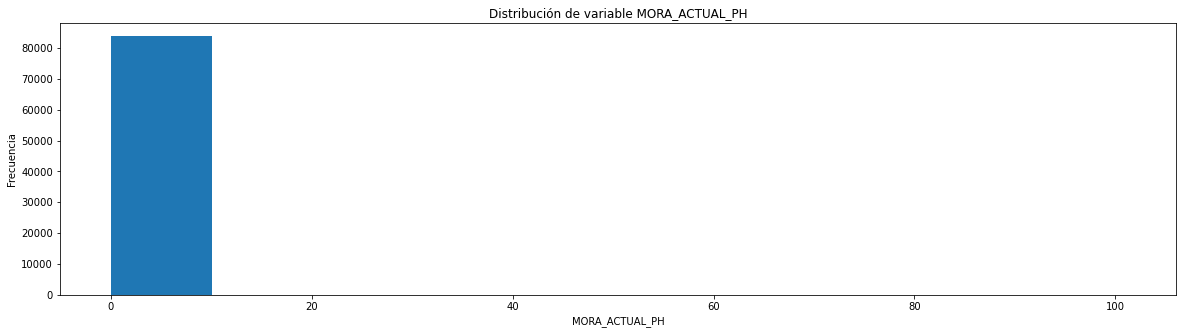

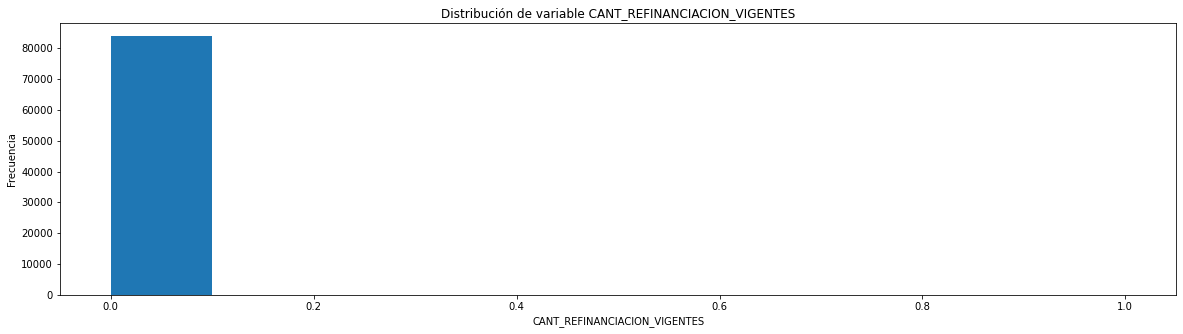

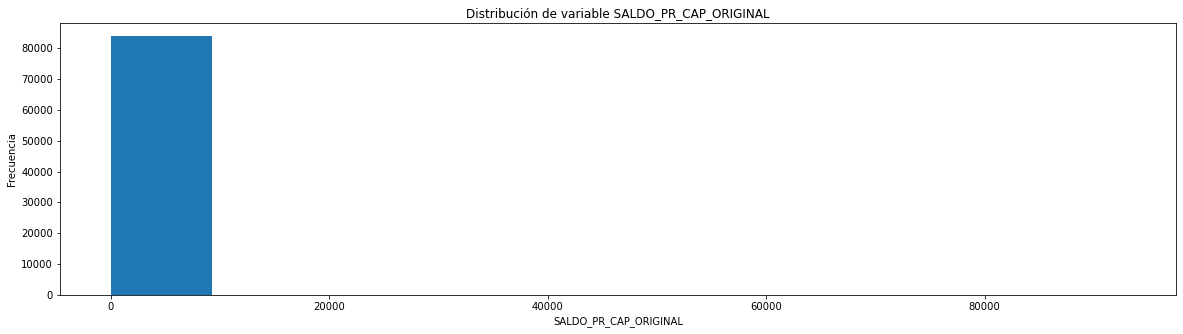

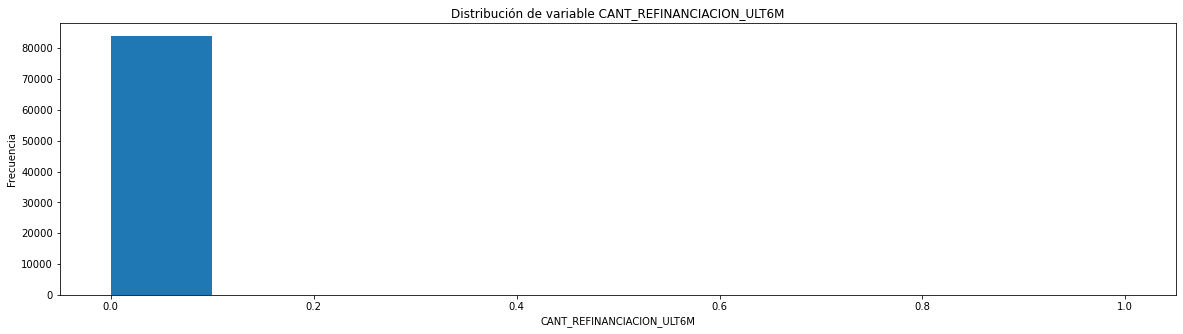

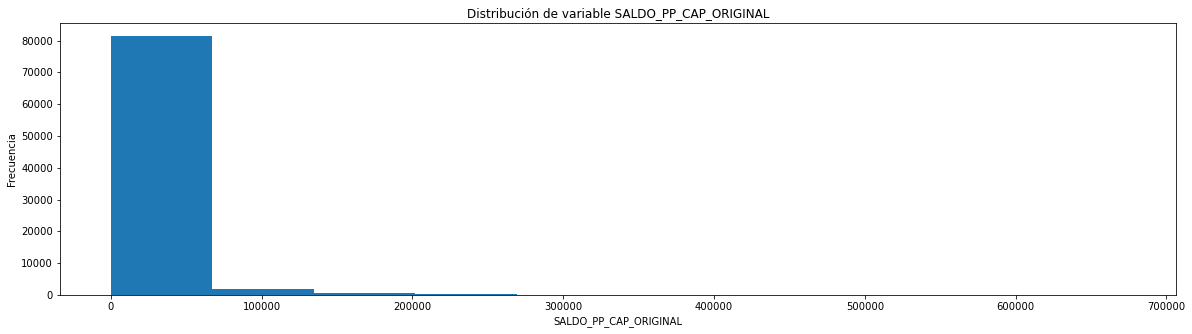

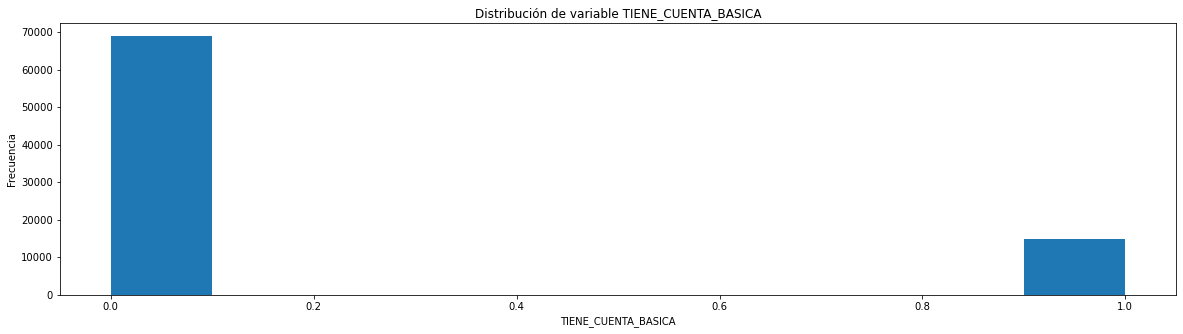

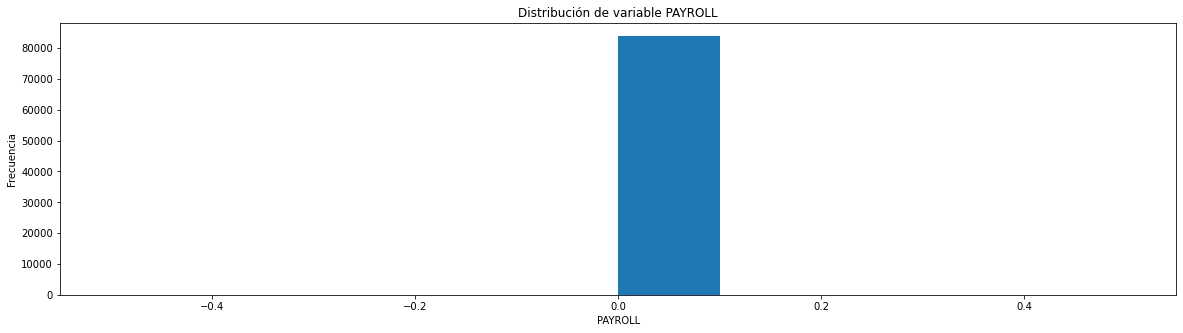

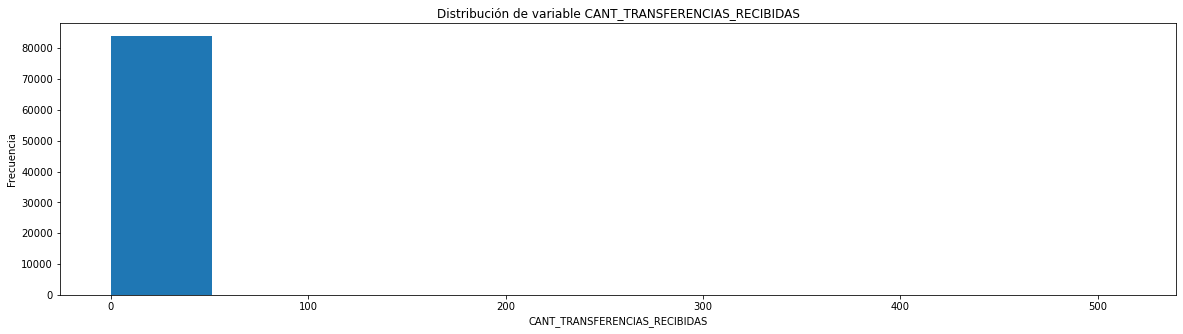

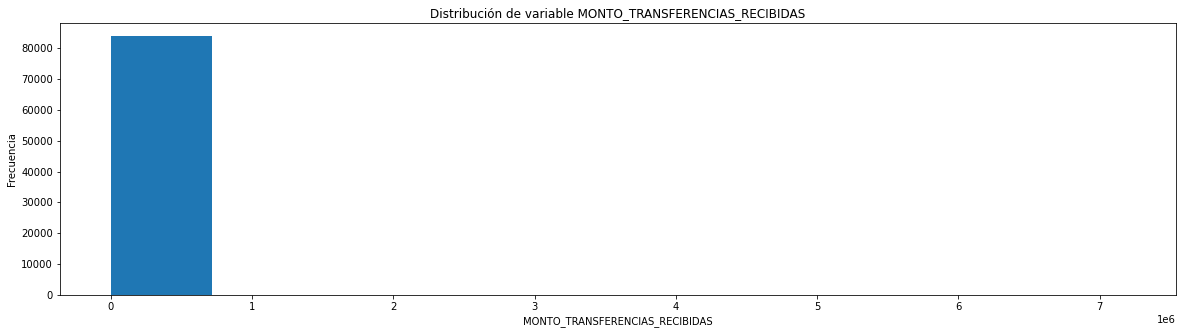

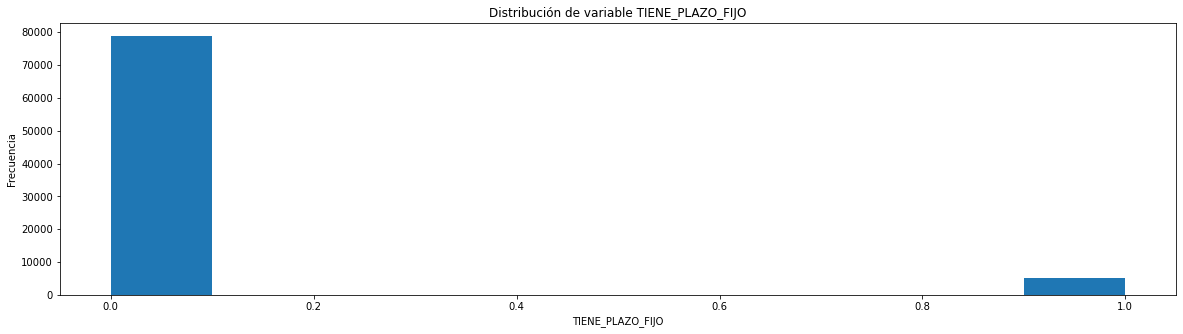

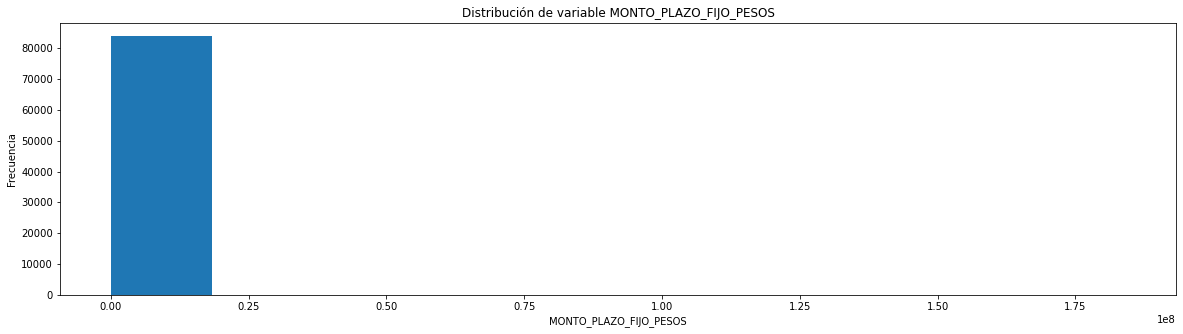

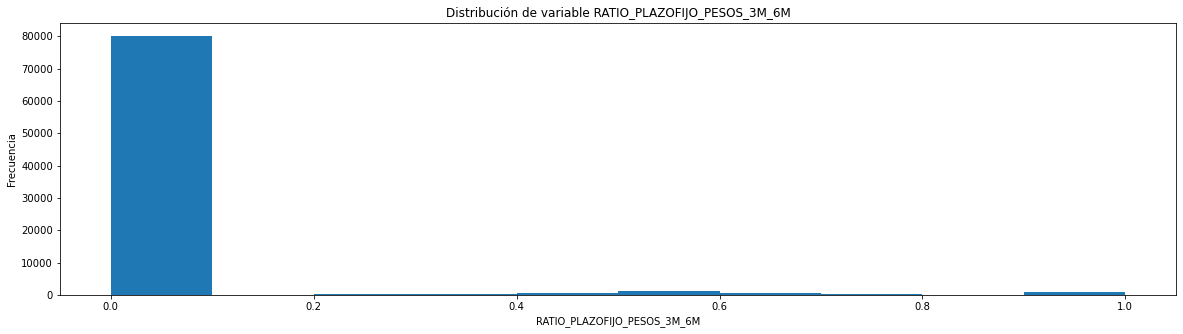

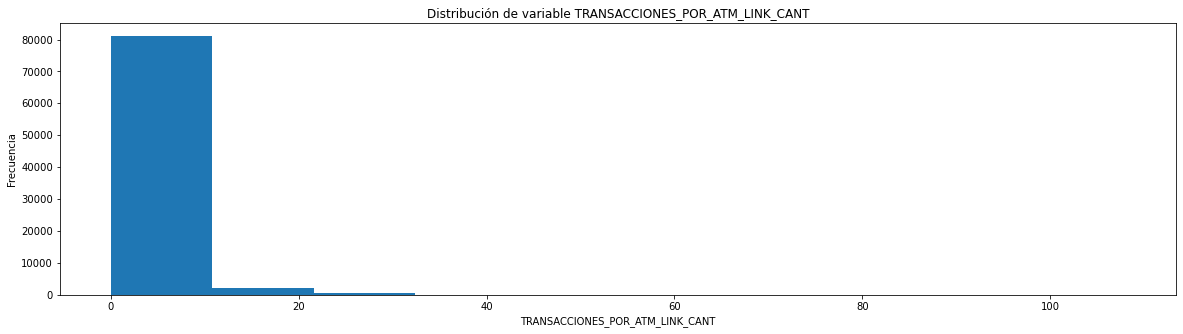

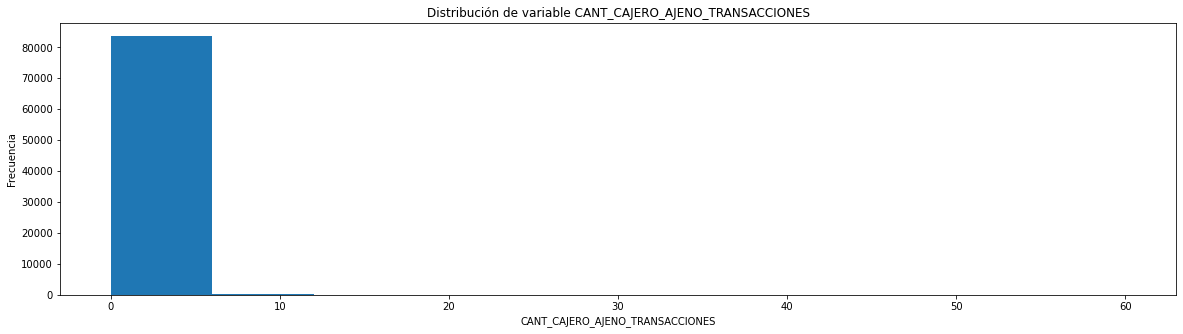

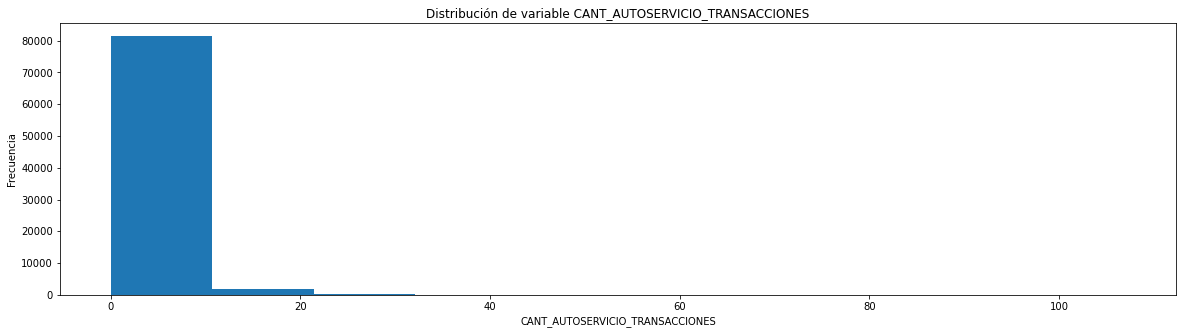

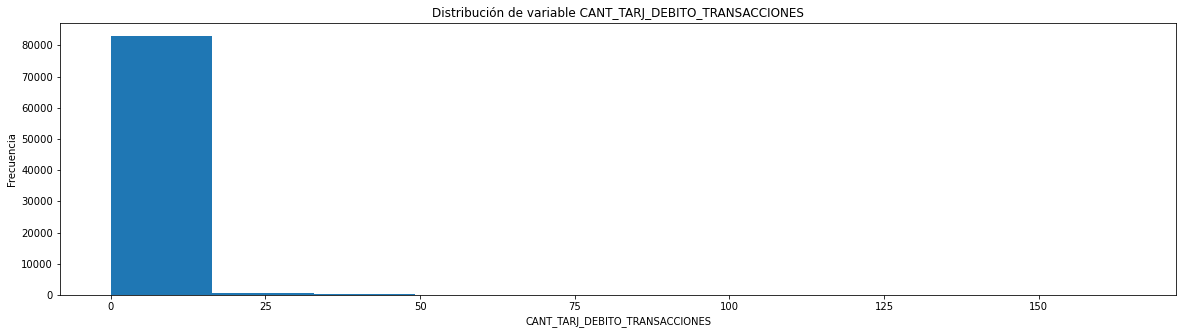

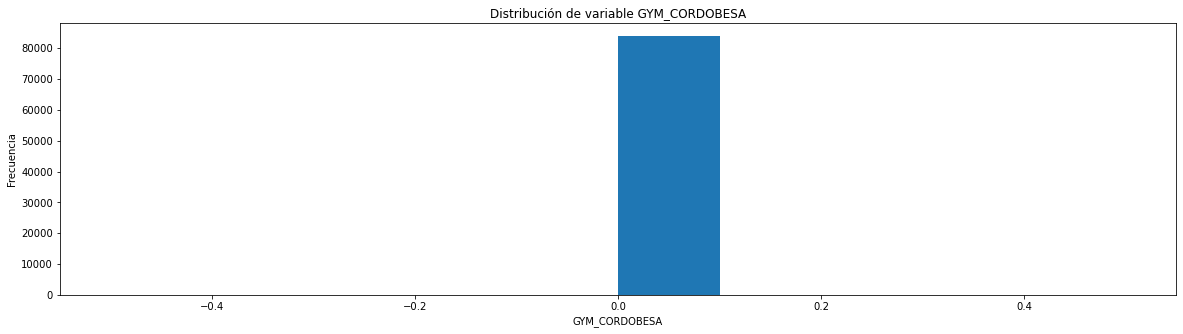

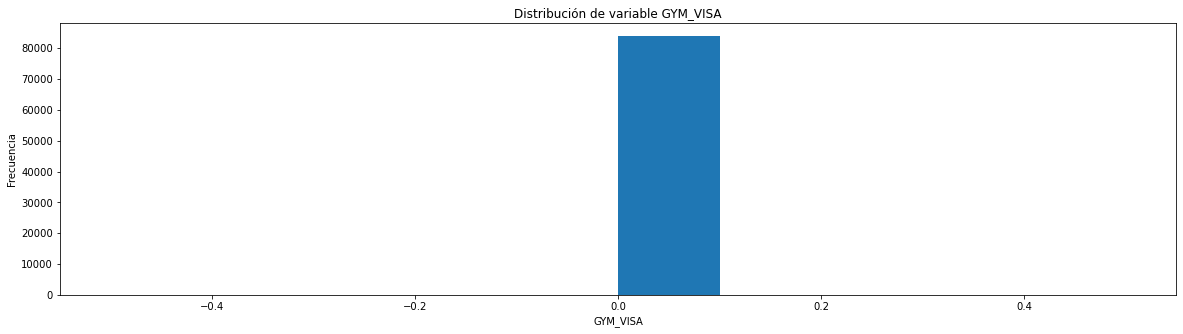

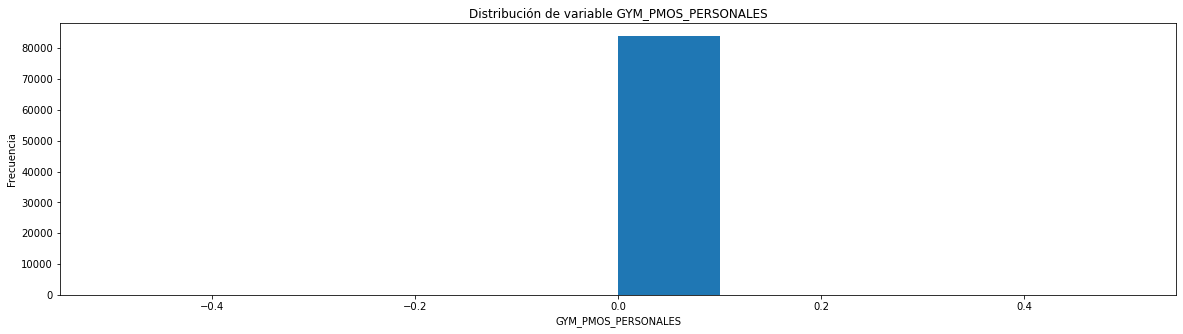

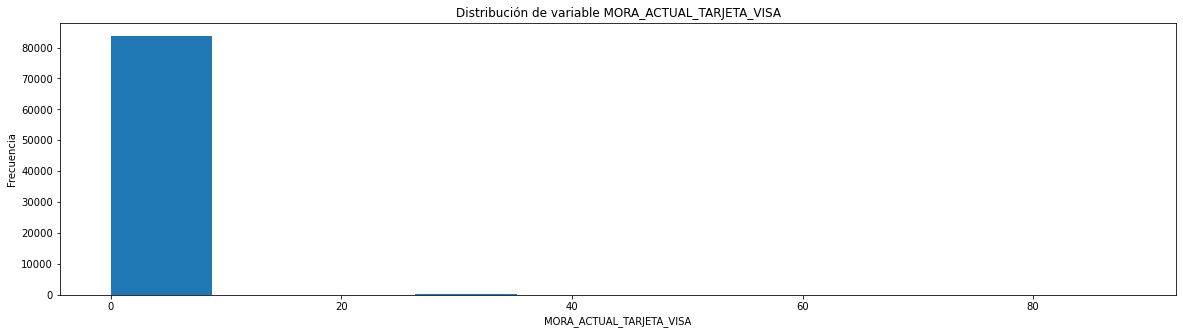

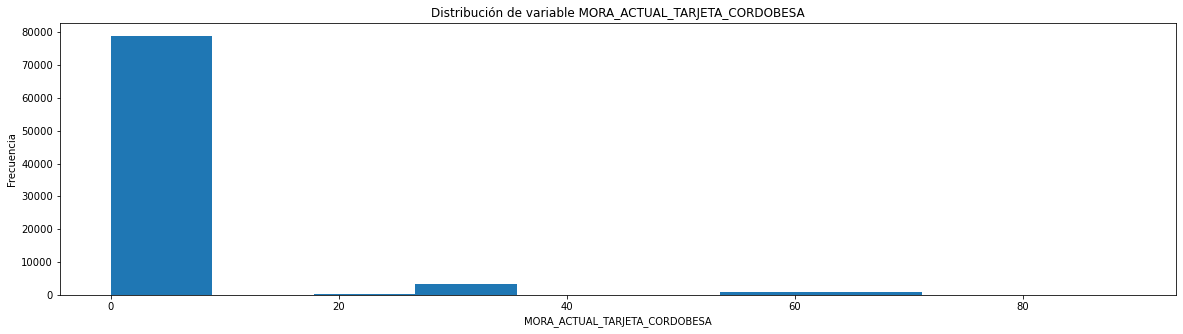

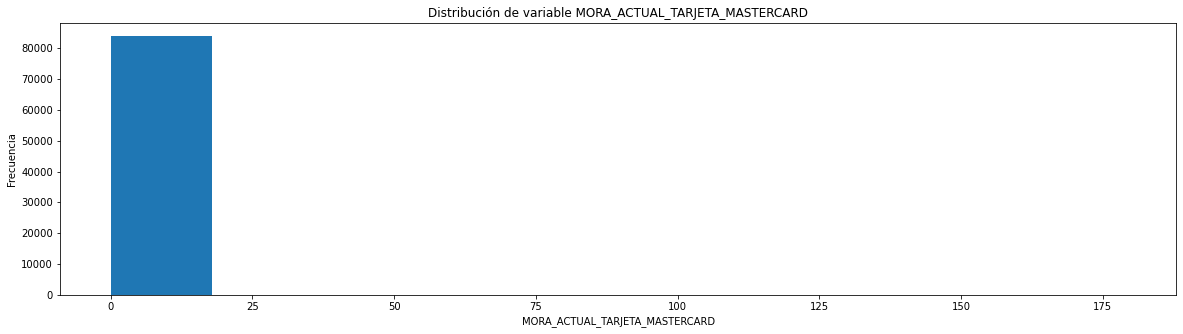

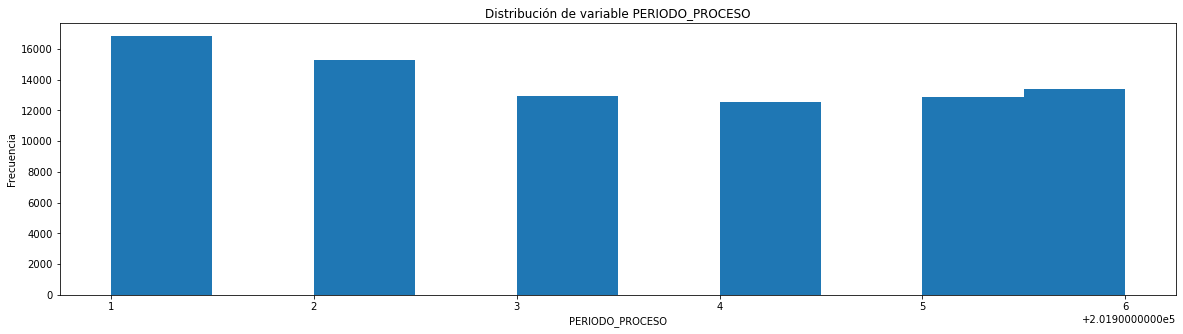

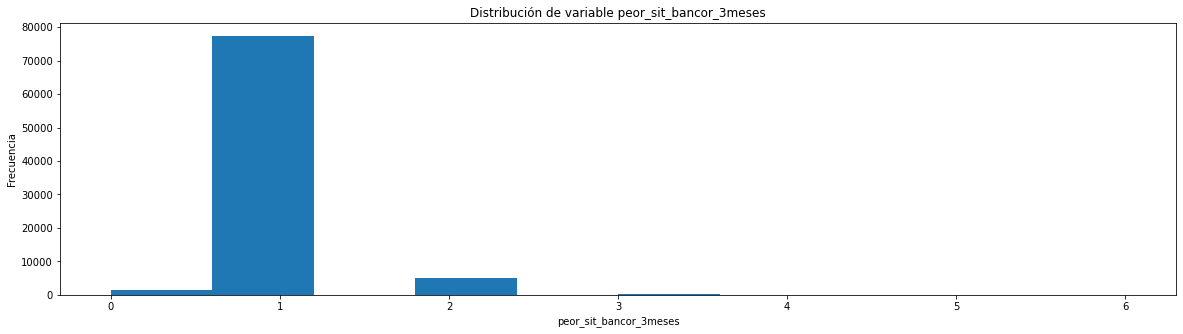

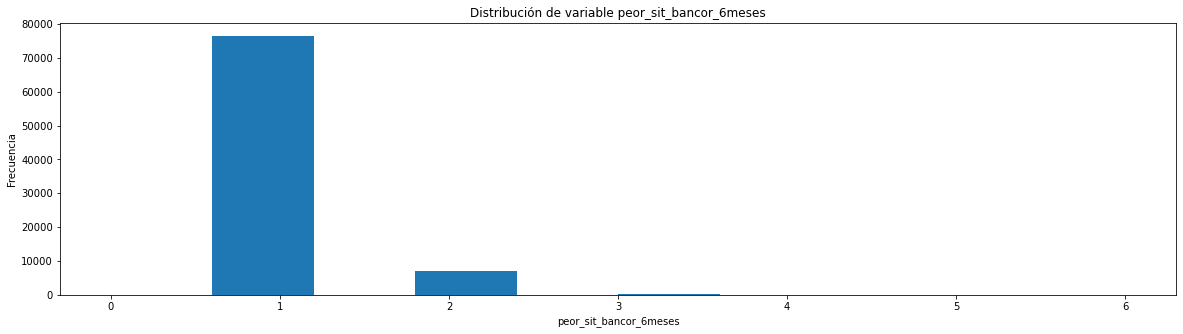

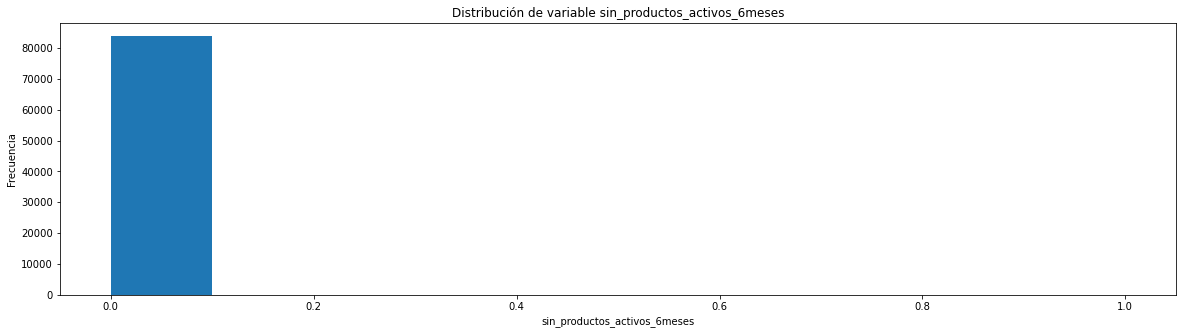

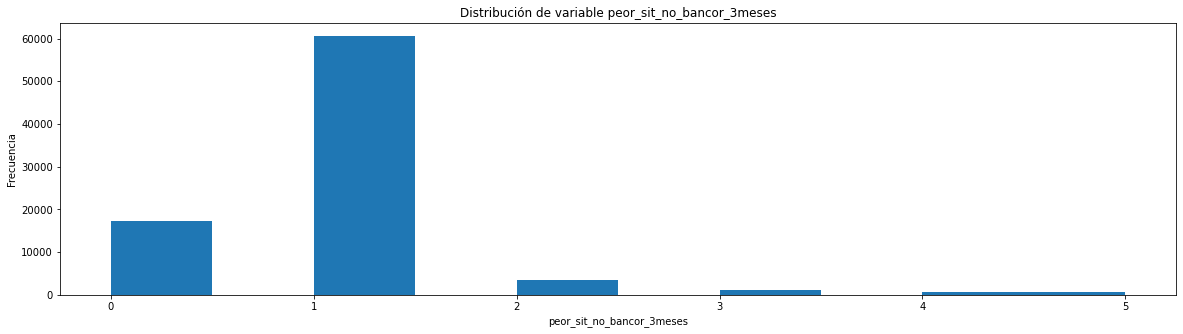

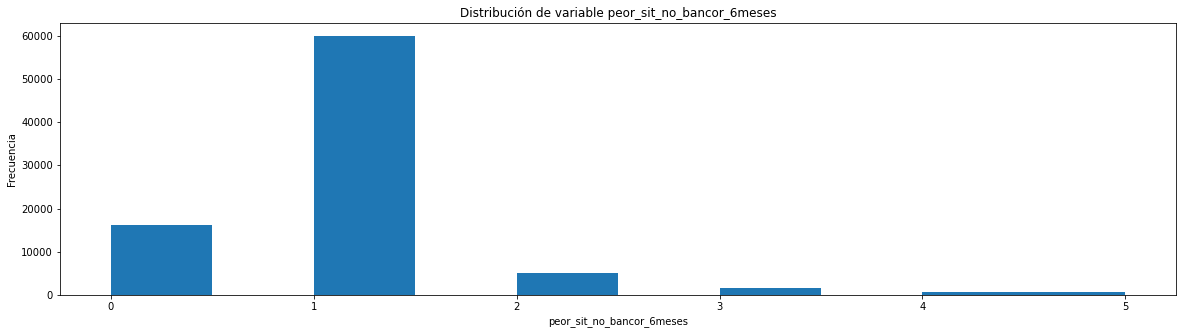

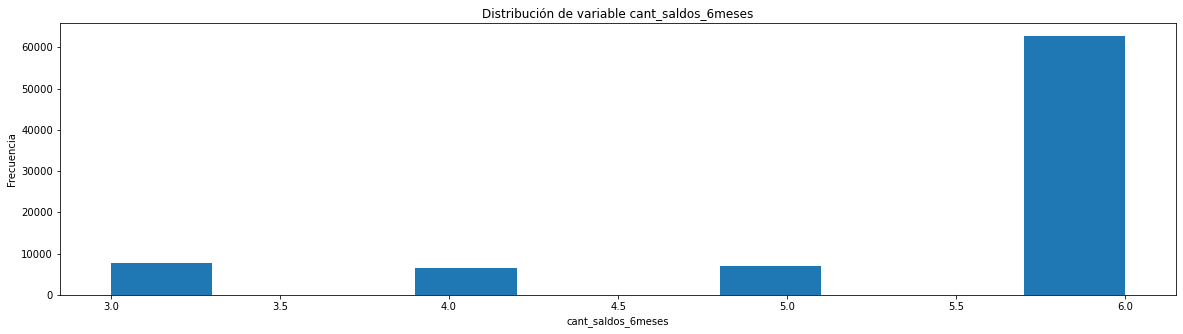

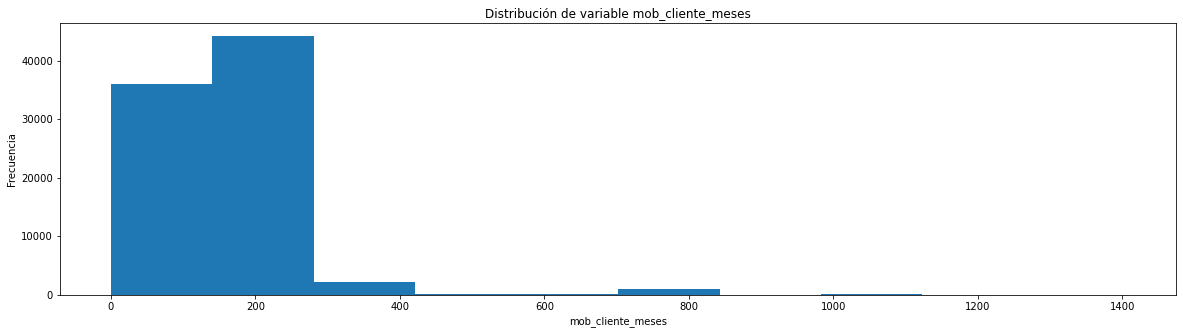

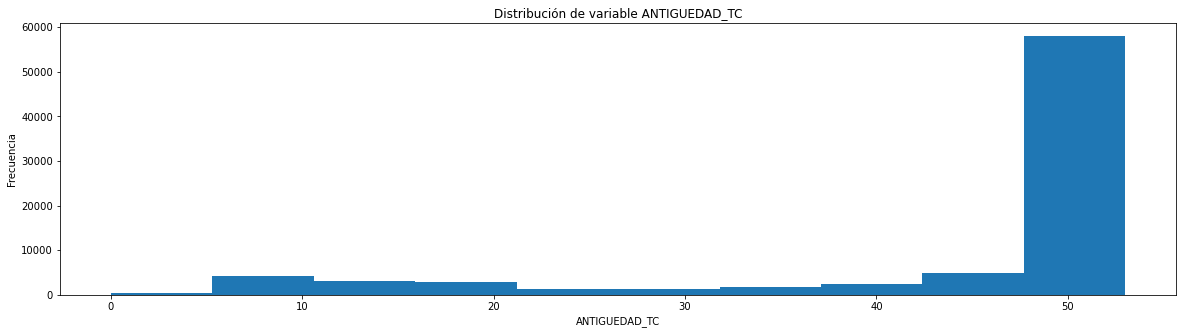

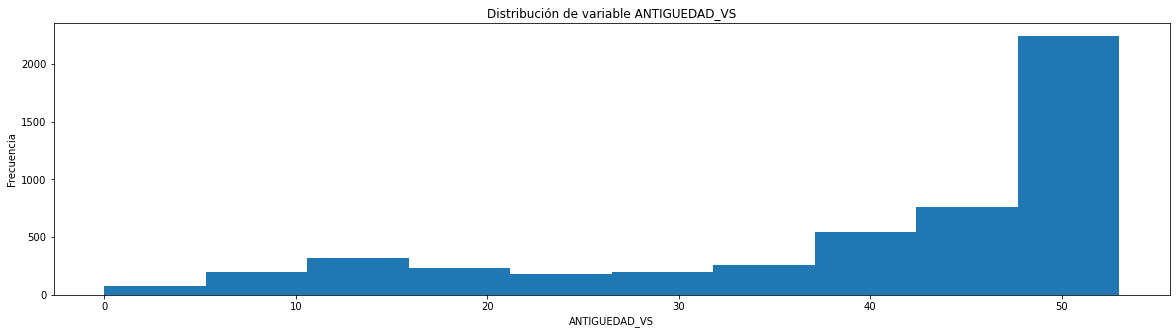

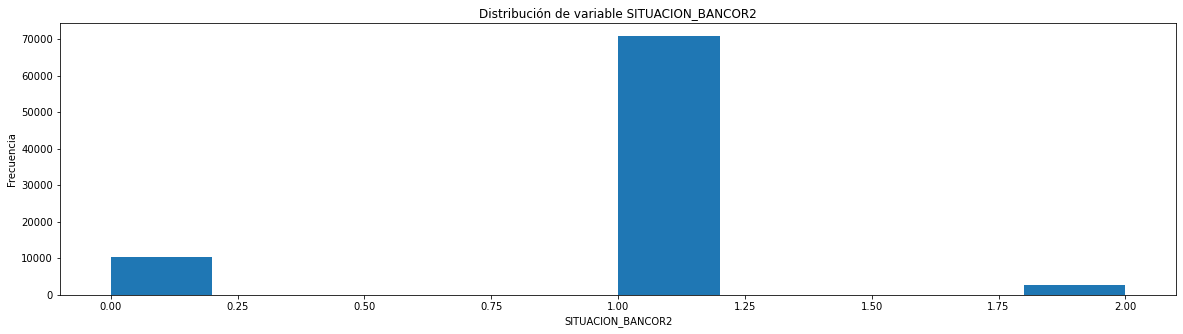

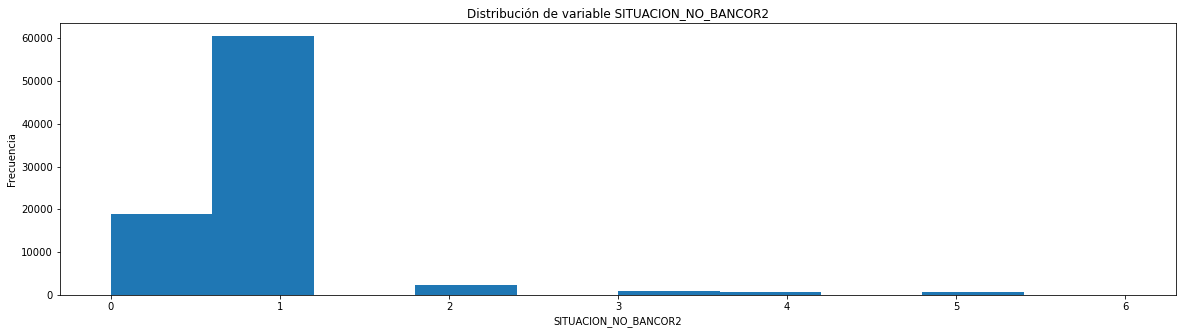

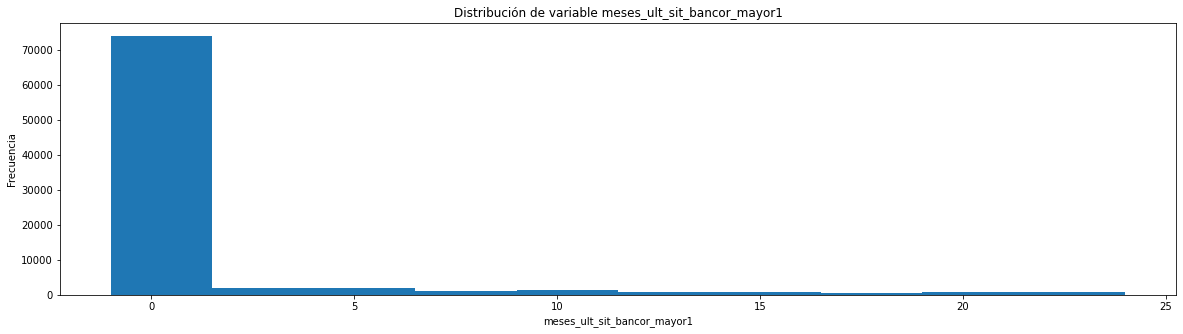

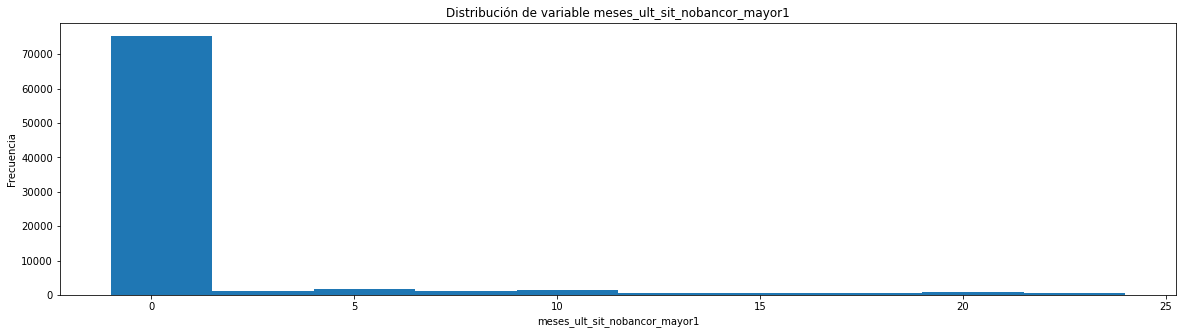

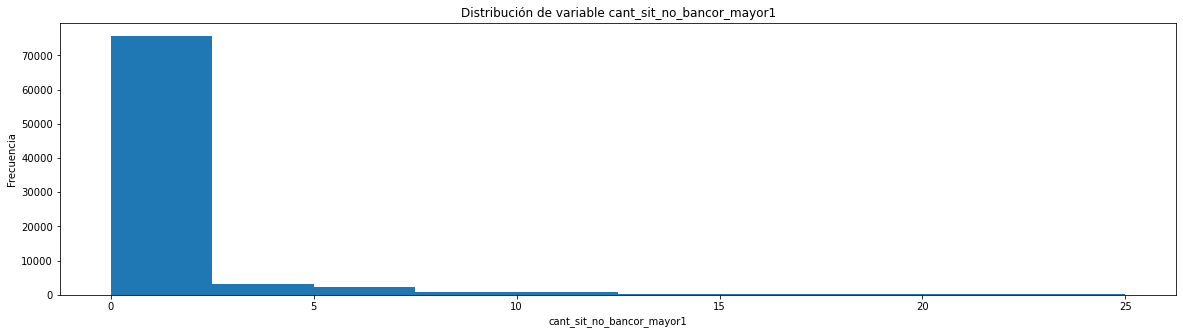

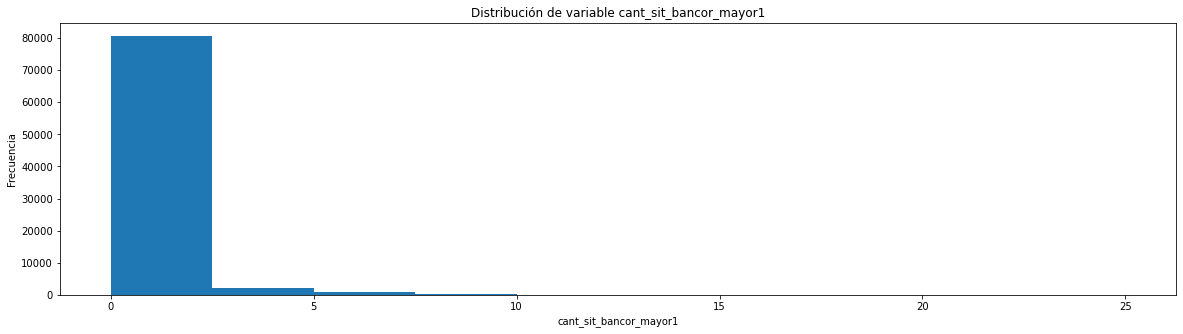

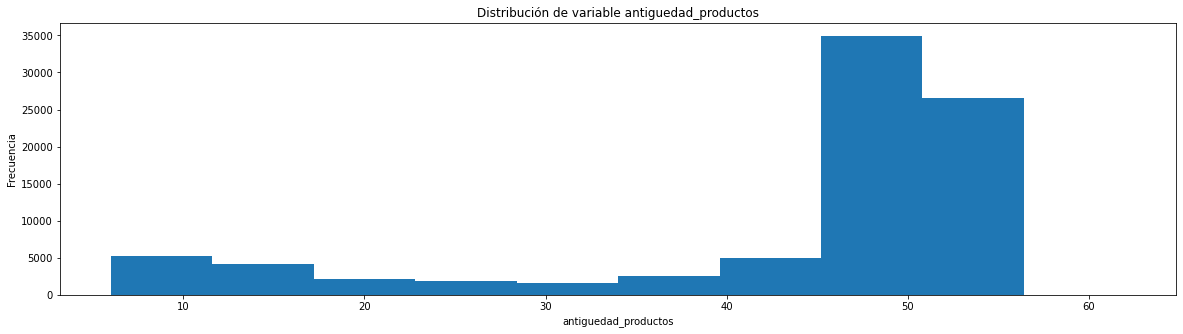

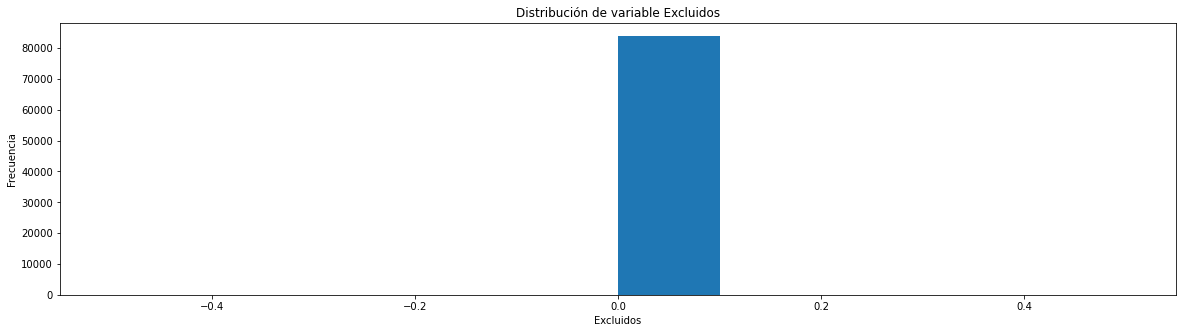

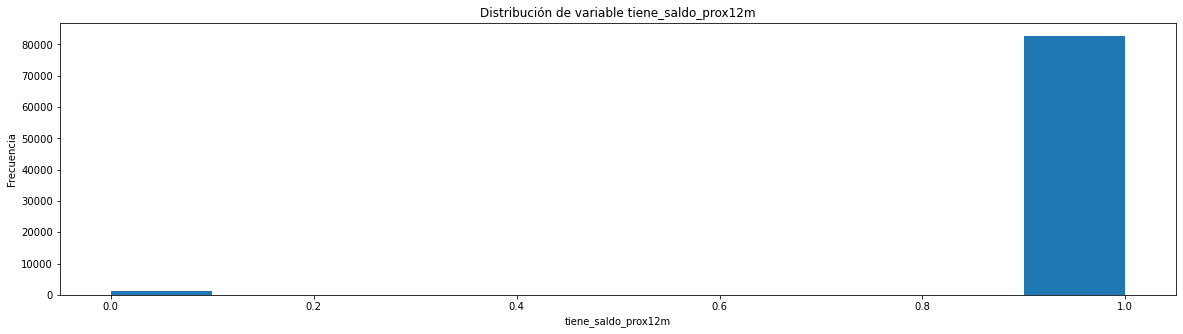

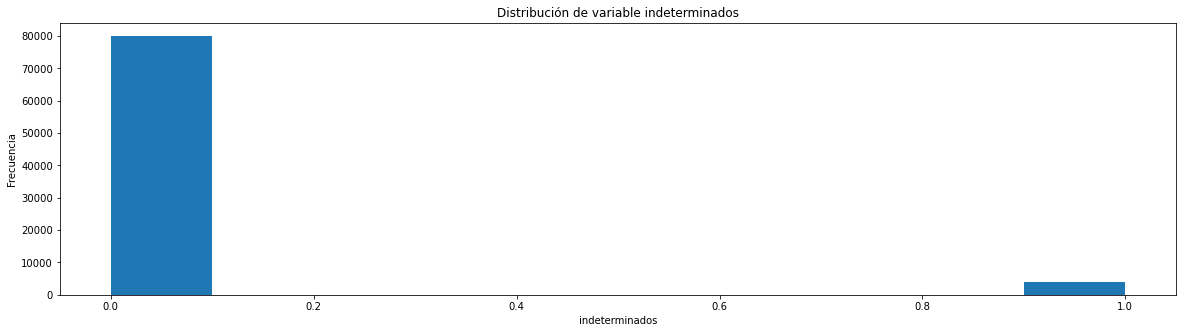

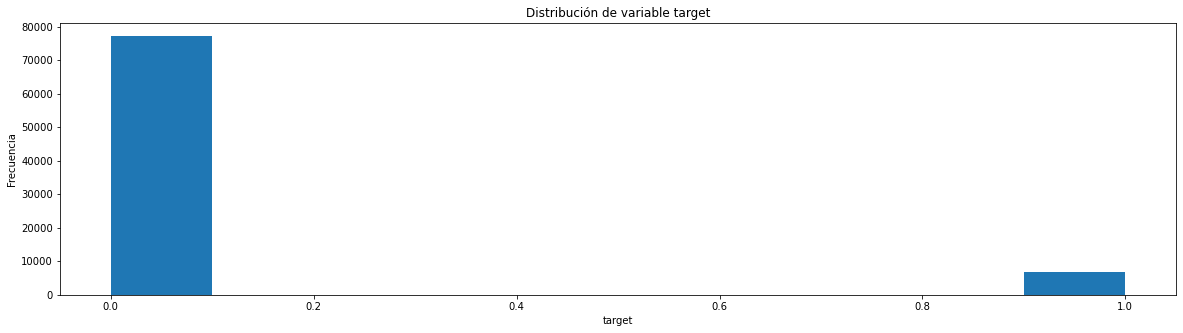

In [15]:
for var in numbase : 
    fig = plt.figure(figsize =(20, 5))

    plt.hist(data=base, x=var, bins = 10)
    plt.title(f'Distribución de variable {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()

In [16]:
# Se añaden gráficos de dispersión 

C:\Users\u190850\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


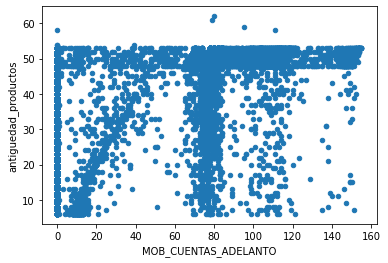

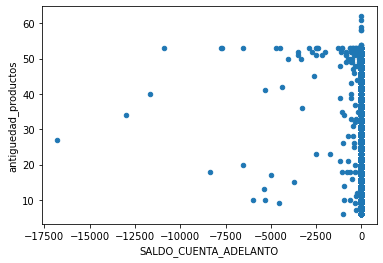

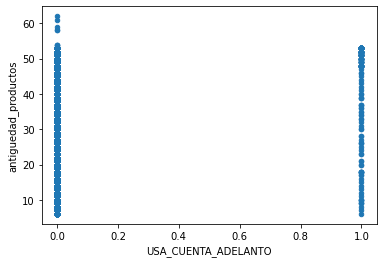

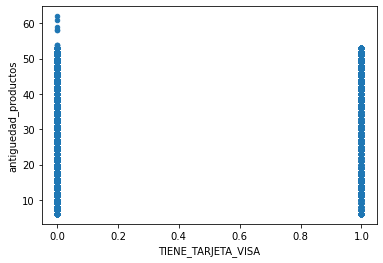

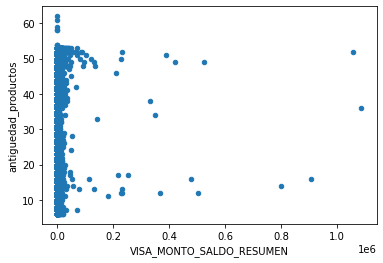

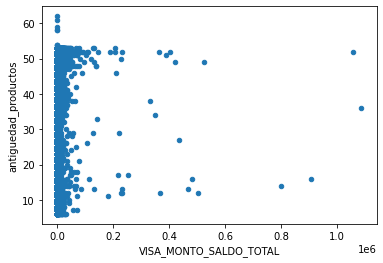

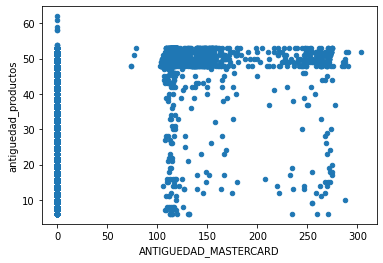

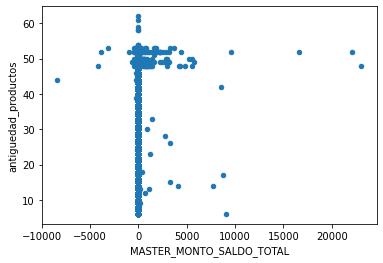

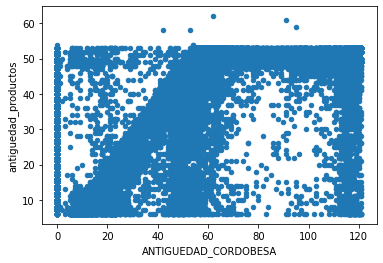

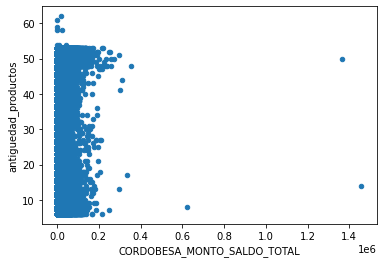

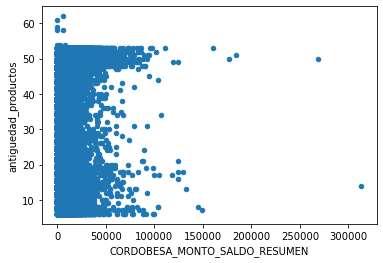

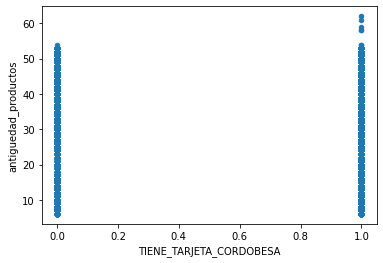

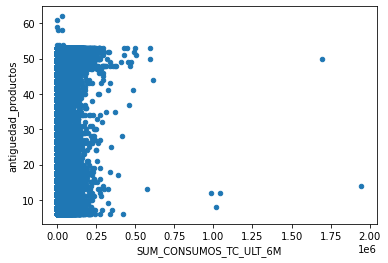

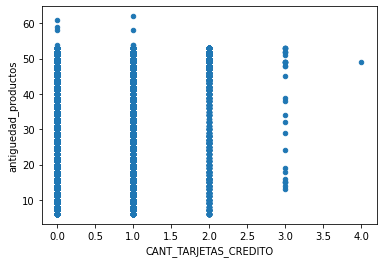

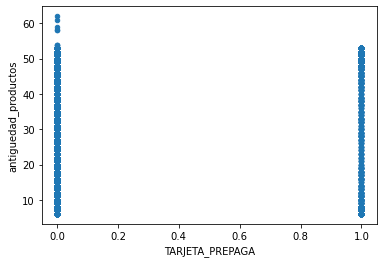

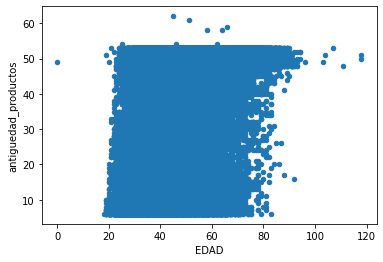

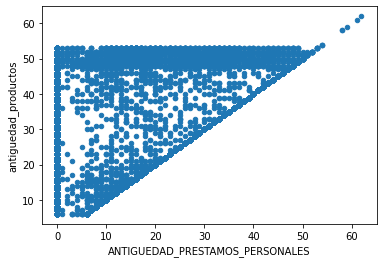

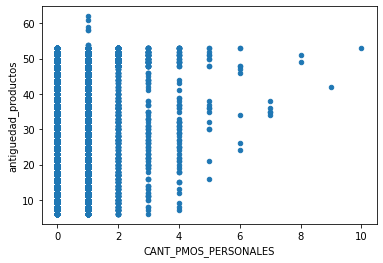

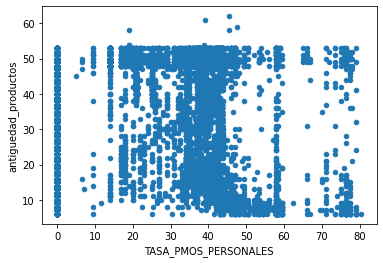

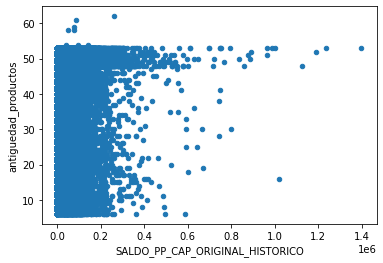

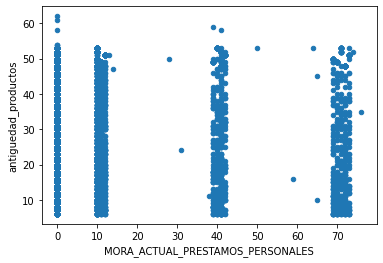

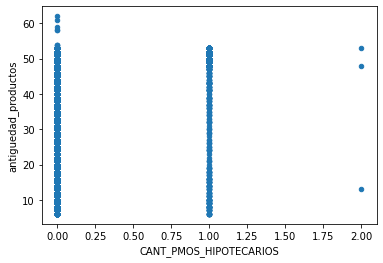

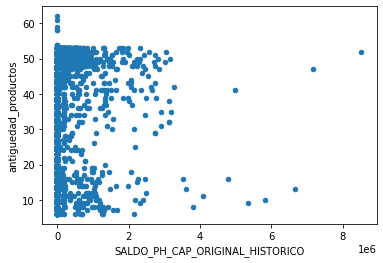

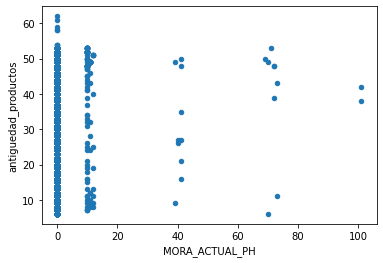

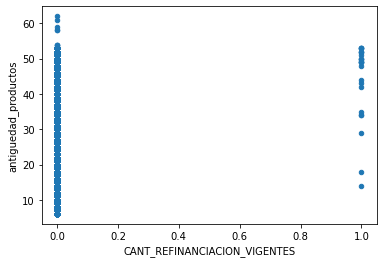

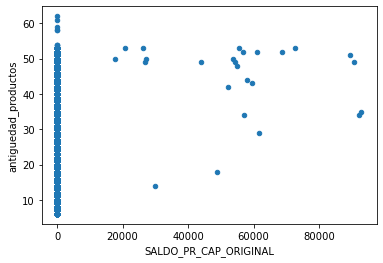

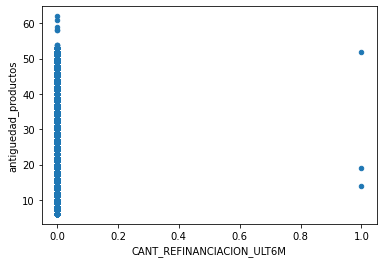

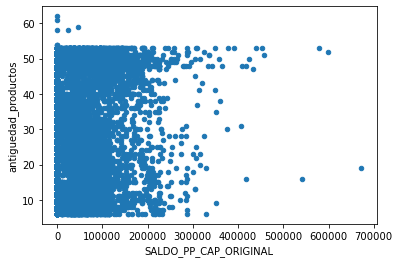

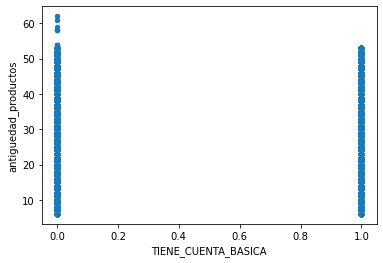

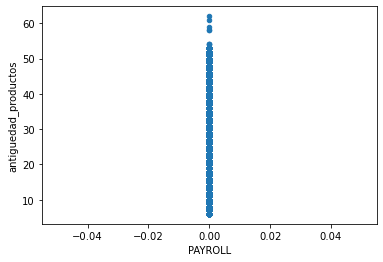

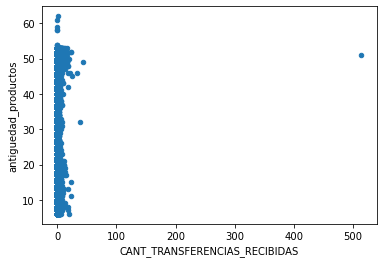

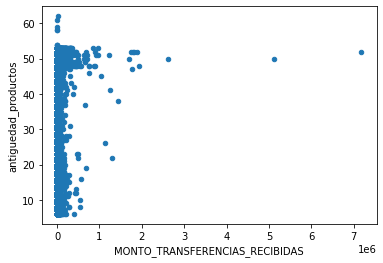

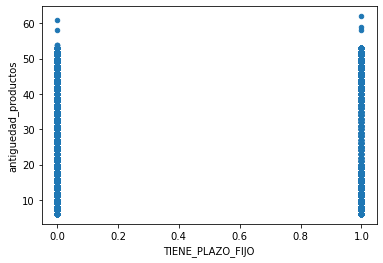

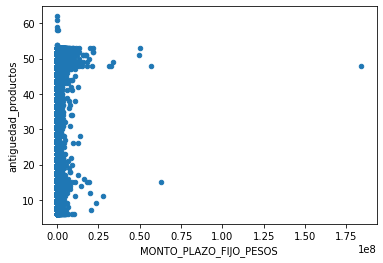

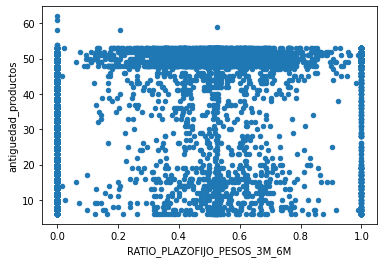

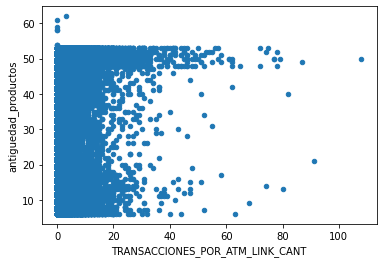

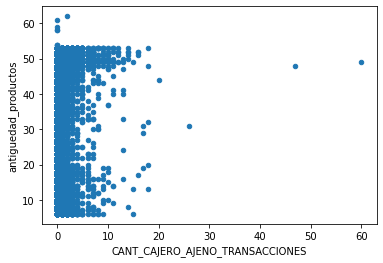

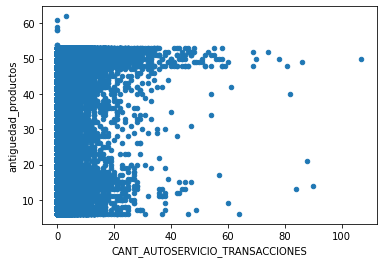

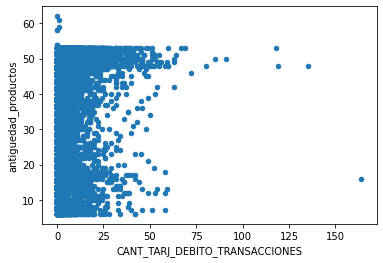

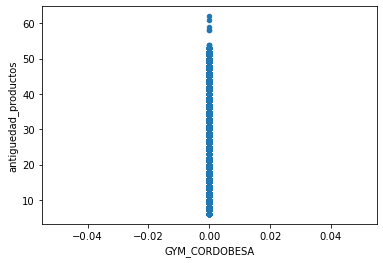

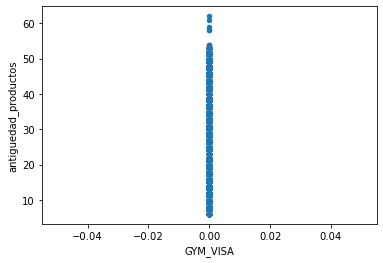

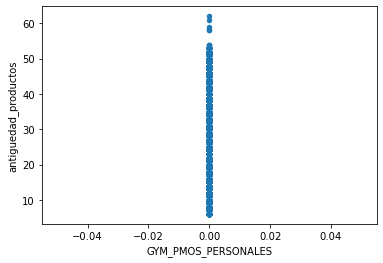

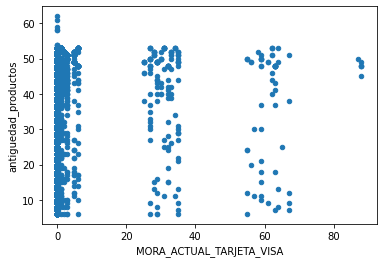

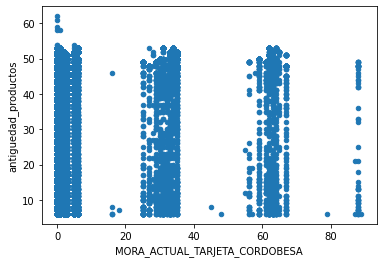

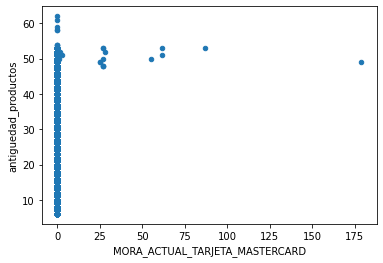

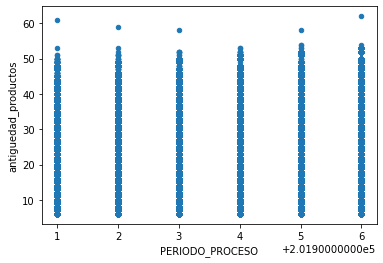

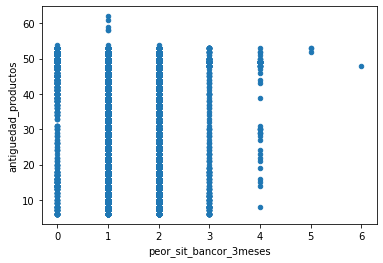

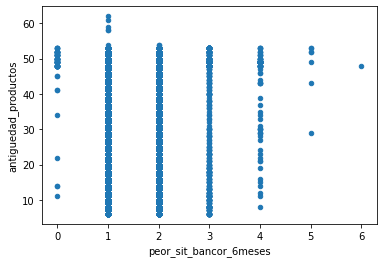

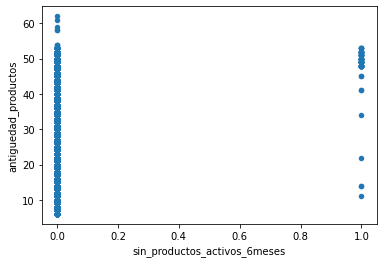

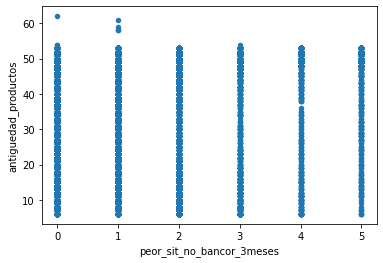

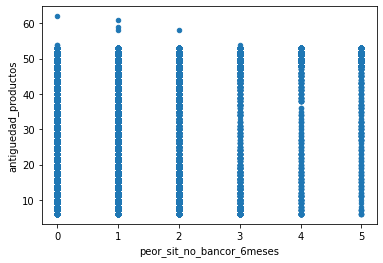

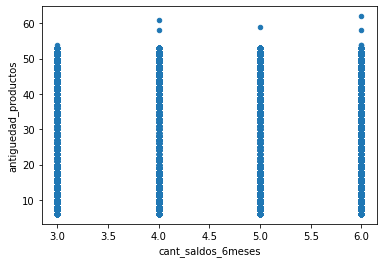

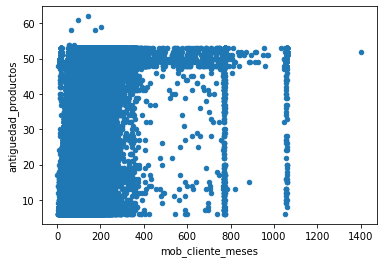

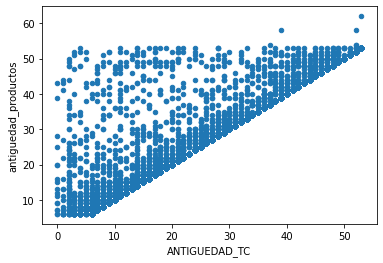

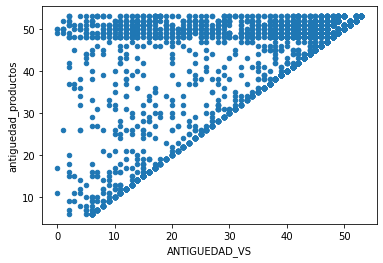

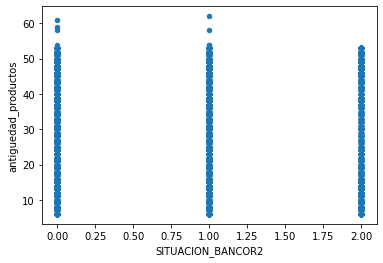

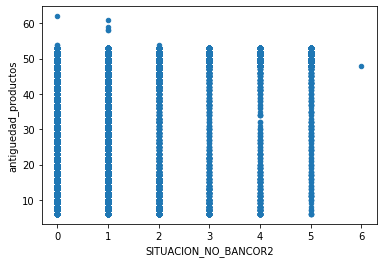

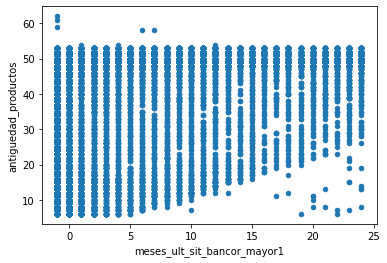

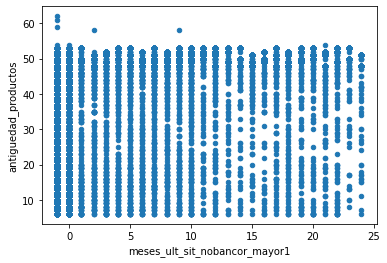

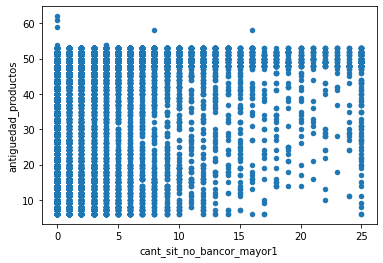

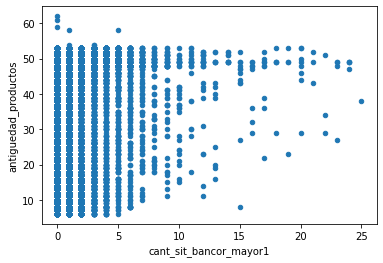

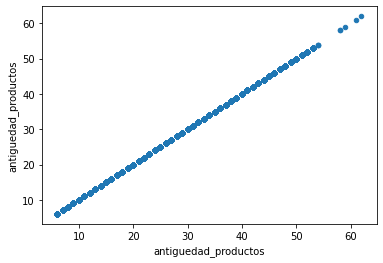

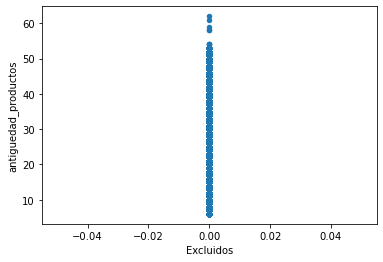

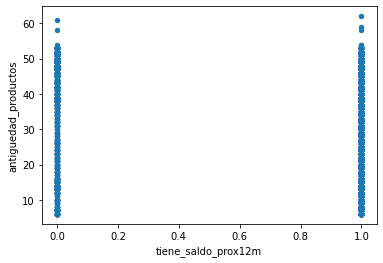

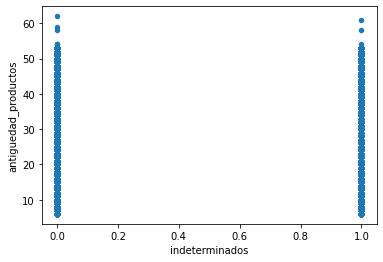

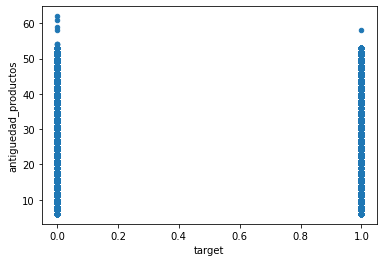

In [17]:
for x in numbase:
    numbase.plot.scatter(x,'antiguedad_productos')

In [18]:
# Vemos si la base posee valores faltantes
for x in base:
    if base[x].isnull().values.any():
        print("La variable : " + x +" tiene valores faltantes")

La variable : mob_cliente_meses tiene valores faltantes
La variable : ANTIGUEDAD_TC tiene valores faltantes
La variable : ANTIGUEDAD_VS tiene valores faltantes
